# **HEART DISEASE ANALYSIS**

In this project, we will analyze [Cardiovascular Disease dataset] [CVD] (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) to find which variables are related to the disease. Then we will use different machine learning models to predict whether the patient has  cardiovascular disease or not. <br>The dataset contains information about patients doing cardiovascular disease examination.<br><br>
**Data features:**
   - Age | Objective Feature | age | int (years)<br>
   - Height | Objective Feature | height | int (cm) |<br>
   - Weight | Objective Feature | weight | float (kg) |<br>
   - BMI | Objective Feature | bmi | int |<br>
   - Gender | Objective Feature | gender | categorical code |<br>
   - Systolic blood pressure | Examination Feature | ap_hi | int |<br>
   - Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
   - Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
   - Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
   - Smoking | Subjective Feature | smoke | binary |<br>
   - Alcohol | Subjective Feature | alco | binary |<br>
   - Physical Activity | Subjective Feature | active | binary |<br>
   - Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>


In [1]:
%pip install xgboost

In [2]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [3]:
data = pd.read_csv('/content/cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Modification

In [4]:
data['weight'] = data['weight'].astype(int)

In [5]:
data['BMI'] = data['weight']/((data['height']/100)**2)   #Body mass index
data['BMI'] = data['BMI'].astype(int)

data['Age'] = data['age']/365
data['Age'] = data['Age'].astype(int)

In [6]:
#Body Mass Index = BMI
#Systolic blood pressure = ap_hi
#Diastolic blood pressure = ap_lo
data['Systolic Blood Pressure'] = data['ap_hi'].astype(int)
data['Diastolic Blood Pressure'] = data['ap_lo'].astype(int)

In [7]:
data.drop(['id', 'age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco','active','height','weight', 'ap_hi','ap_lo' ], axis=1, inplace=True)
data

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,21,50,110,80
1,1,34,55,140,90
2,1,23,51,130,70
3,1,28,48,150,100
4,0,23,47,100,60
...,...,...,...,...,...
69995,0,26,52,120,80
69996,1,50,61,140,90
69997,1,31,52,180,90
69998,1,27,61,135,80


In [8]:
data.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499700,27.064286,52.840671,128.817286,96.630414
std,0.500003,6.100707,6.766774,154.011419,188.472530
min,0.000000,3.000000,29.000000,-150.000000,-70.000000
25%,0.000000,23.000000,48.000000,120.000000,80.000000
50%,0.000000,26.000000,53.000000,120.000000,80.000000
75%,1.000000,30.000000,58.000000,140.000000,90.000000
max,1.000000,298.000000,64.000000,16020.000000,11000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cardio                    70000 non-null  int64
 1   BMI                       70000 non-null  int64
 2   Age                       70000 non-null  int64
 3   Systolic Blood Pressure   70000 non-null  int64
 4   Diastolic Blood Pressure  70000 non-null  int64
dtypes: int64(5)
memory usage: 2.7 MB


In [10]:
data.cardio.value_counts()

,count
cardio,
0,35021
1,34979


### **Missing Value Detection**

In [11]:
print("{} rows are same".format(data.duplicated().sum()))

48442 rows are same


In [12]:
data.drop_duplicates(inplace= True)
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


Text(0.5, 1.0, 'Visualization of outliers')

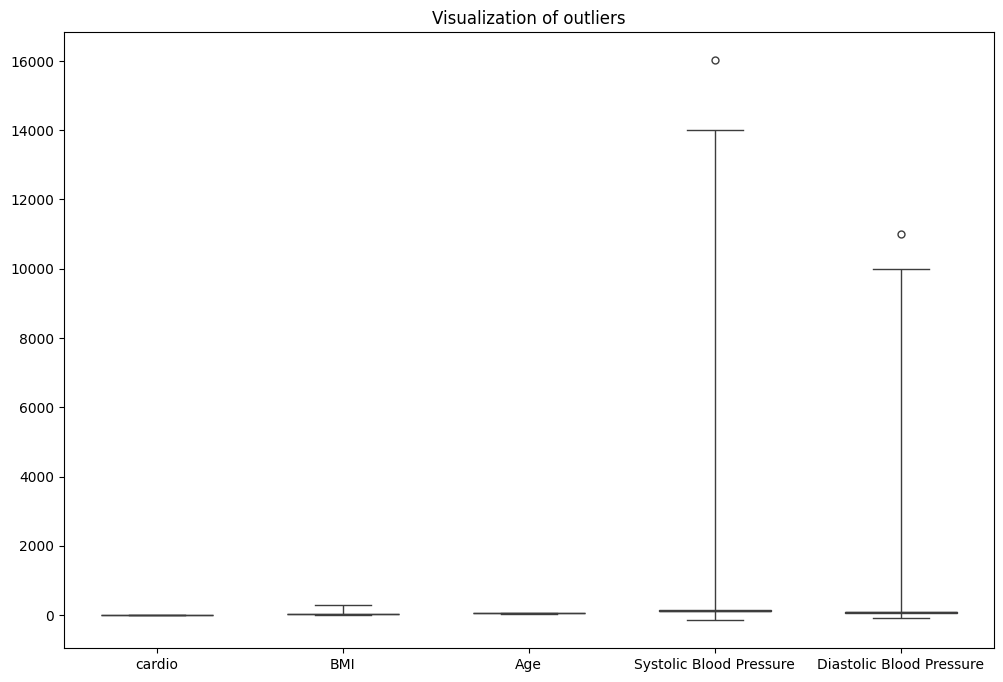

In [13]:
# BoxPlot after removing the outliers.
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = data, width = .6, whis=500, ax = ax, fliersize = 5)
plt.title("Visualization of outliers")

<ipython-input-14-0d2aa07570e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['Age'],x=data['cardio'],ax=ax[0], width = .4, palette='winter')
<ipython-input-14-0d2aa07570e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['BMI'],x=data['cardio'],ax=ax[1], width = .4, palette='winter')


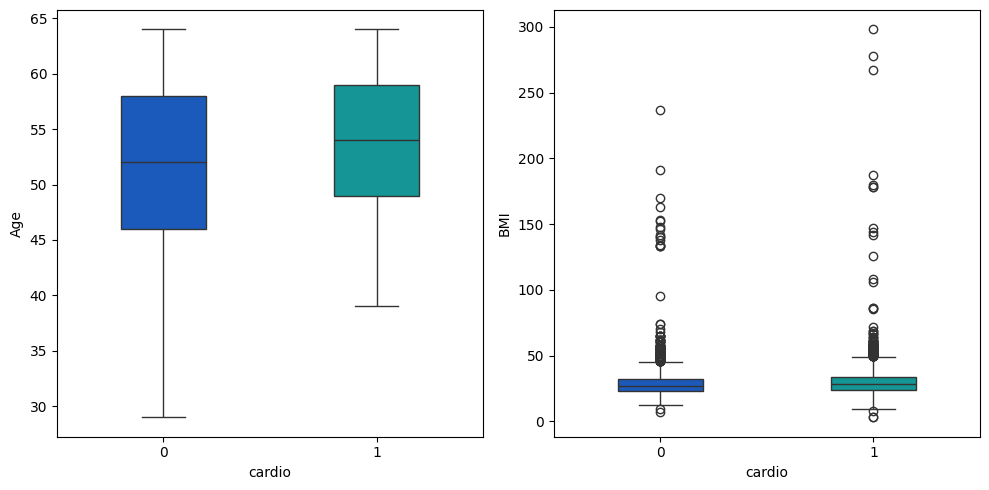

In [14]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data['Age'],x=data['cardio'],ax=ax[0], width = .4, palette='winter')
sns.boxplot(y=data['BMI'],x=data['cardio'],ax=ax[1], width = .4, palette='winter')
plt.tight_layout()

<ipython-input-15-ebfcba9eaefb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['Systolic Blood Pressure'],x=data['cardio'],ax=ax[0],whis=500, width = .4, palette='winter')
<ipython-input-15-ebfcba9eaefb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['Diastolic Blood Pressure'],x=data['cardio'],ax=ax[1],whis=500, width = .4, palette='winter')


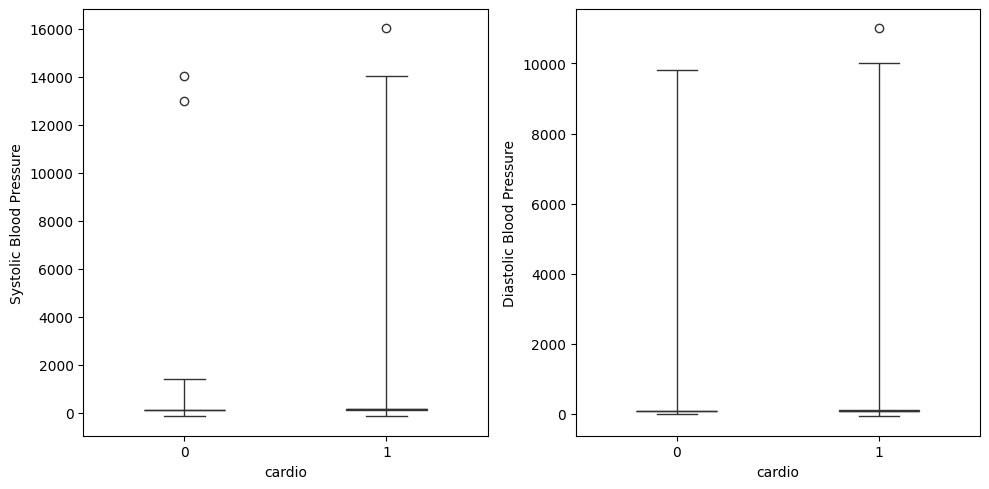

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data['Systolic Blood Pressure'],x=data['cardio'],ax=ax[0],whis=500, width = .4, palette='winter')
sns.boxplot(y=data['Diastolic Blood Pressure'],x=data['cardio'],ax=ax[1],whis=500, width = .4, palette='winter')
plt.tight_layout()

In [16]:
df_c0 = data[data['cardio'] == 0]
lista = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c0[e].quantile(0.25)
    Q3 = df_c0[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Age
Q minimo,80.0,40.0,9.5,28.0
Q maximo,160.0,120.0,45.5,76.0


In [17]:
outlier_c0 = df_c0[(df_c0['Diastolic Blood Pressure']>90)|(df_c0['Diastolic Blood Pressure']<60)|(df_c0['Systolic Blood Pressure']>130)|(df_c0['Systolic Blood Pressure']<100)|(df_c0['Age']>64)|(df_c0['Age']<39)| (df_c0['BMI']>24.9)|(df_c0['BMI']<18.5)].index
df_c0.drop(outlier_c0, inplace=True)

<ipython-input-17-be7aa623197a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c0.drop(outlier_c0, inplace=True)


In [18]:
df_c0.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,2059.0,2059.000000,2059.000000,2059.000000,2059.000000
mean,0.0,21.890724,51.016513,115.196697,75.021370
std,0.0,1.623804,7.209466,10.015764,9.367589
min,0.0,19.000000,39.000000,100.000000,60.000000
25%,0.0,21.000000,45.000000,110.000000,70.000000
50%,0.0,22.000000,51.000000,120.000000,78.000000
75%,0.0,23.000000,57.000000,120.000000,80.000000
max,0.0,24.000000,64.000000,130.000000,90.000000


In [19]:
df_c1 = data[data['cardio'] == 1]

In [20]:
lista = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c1[e].quantile(0.25)
    Q3 = df_c1[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Age
Q minimo,75.0,50.0,9.0,34.0
Q maximo,195.0,130.0,49.0,74.0


In [21]:
outlier_c1 = df_c1[(df_c1['Diastolic Blood Pressure']>105)|(df_c1['Diastolic Blood Pressure']<70)|(df_c1['Systolic Blood Pressure']>170)|(df_c1['Systolic Blood Pressure']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
df_c1.drop(outlier_c1, inplace=True)
df_c1.describe()

<ipython-input-21-25bf84dc6900>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_c1 = df_c1[(df_c1['Diastolic Blood Pressure']>105)|(df_c1['Diastolic Blood Pressure']<70)|(df_c1['Systolic Blood Pressure']>170)|(df_c1['Systolic Blood Pressure']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
<ipython-input-21-25bf84dc6900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1.drop(outlier_c1, inplace=True)


,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,8854.0,8854.000000,8854.000000,8854.000000,8854.000000
mean,1.0,28.406144,53.294217,136.240456,85.095776
std,0.0,5.564929,6.974422,17.693396,9.644387
min,1.0,16.000000,39.000000,90.000000,70.000000
25%,1.0,24.000000,48.000000,120.000000,80.000000
50%,1.0,28.000000,54.000000,140.000000,85.000000
75%,1.0,33.000000,59.000000,150.000000,90.000000
max,1.0,40.000000,64.000000,170.000000,105.000000


<Axes: xlabel='colunas', ylabel='valores'>

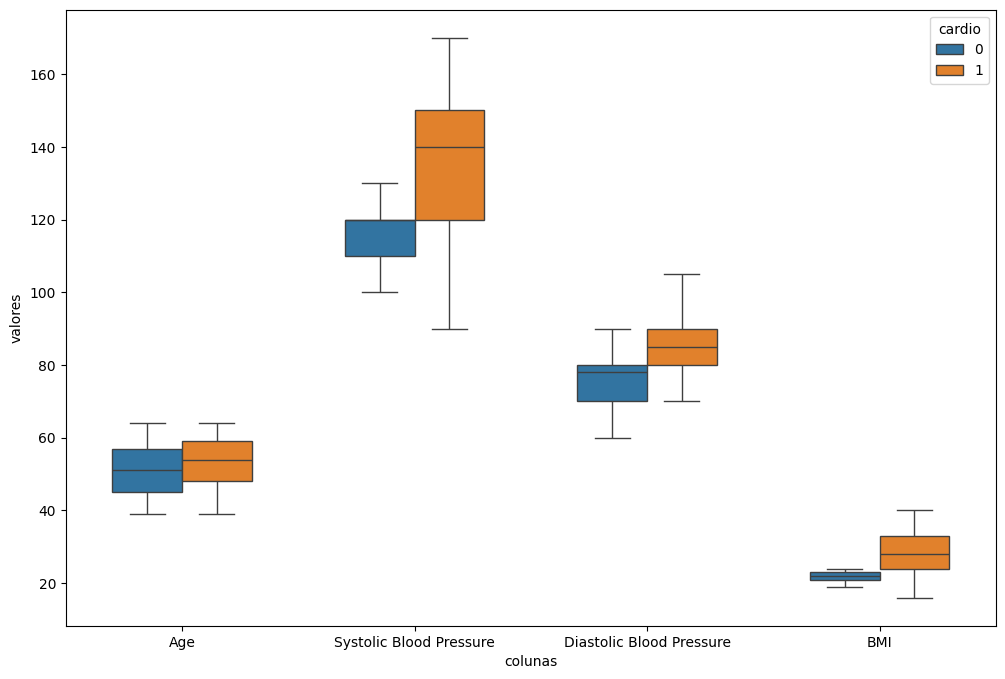

In [22]:
data = pd.concat([df_c0, df_c1])
df = pd.melt(data,id_vars='cardio', value_vars=['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI'], var_name='colunas', value_name='valores', col_level=None)
plt.figure(figsize=(12,8))
sns.boxplot(x='colunas', y='valores',whis=1.5, width = .6, hue='cardio', data=df)

<Axes: xlabel='colunas', ylabel='valores'>

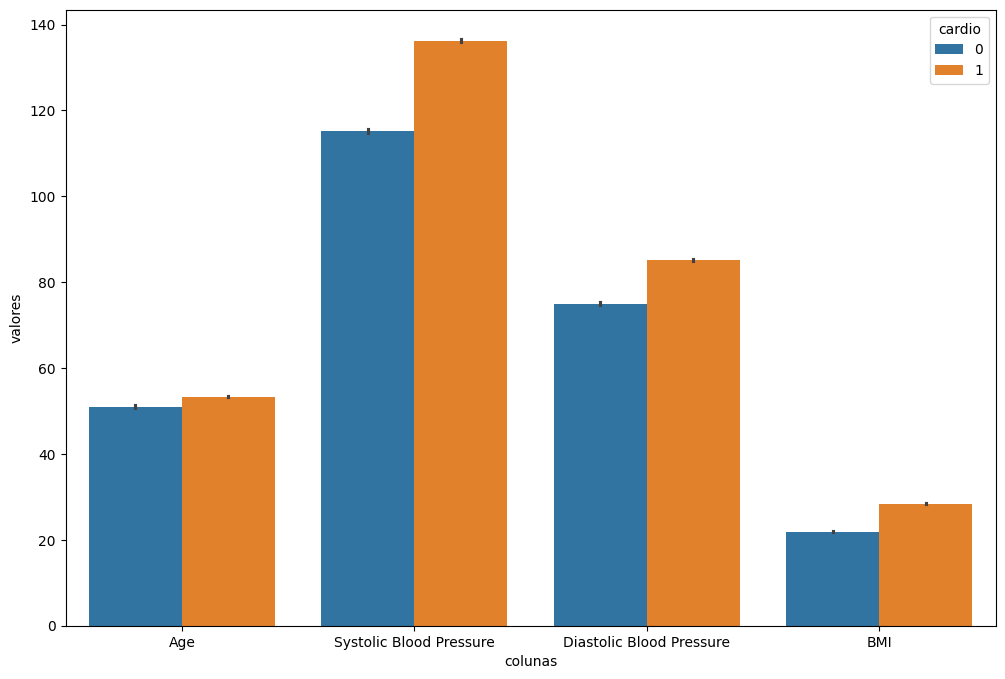

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='colunas', y='valores', hue='cardio',data=df)

### **Missing Value Detection**

In [24]:
data.isnull().sum()

,0
cardio,0
BMI,0
Age,0
Systolic Blood Pressure,0
Diastolic Blood Pressure,0


In [25]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,10913.00,10913.00,10913.00,10913.00,10913.00
mean,0.81,27.18,52.86,132.27,83.19
std,0.39,5.67,7.08,18.46,10.37
min,0.00,16.00,39.00,90.00,60.00
25%,1.00,23.00,47.00,120.00,79.00
50%,1.00,26.00,53.00,130.00,80.00
75%,1.00,31.00,59.00,150.00,90.00
max,1.00,40.00,64.00,170.00,105.00


# Visualization

In [26]:
data.cardio.value_counts()

,count
cardio,
1,8854
0,2059


0 = No Cardio 1 = Cardio


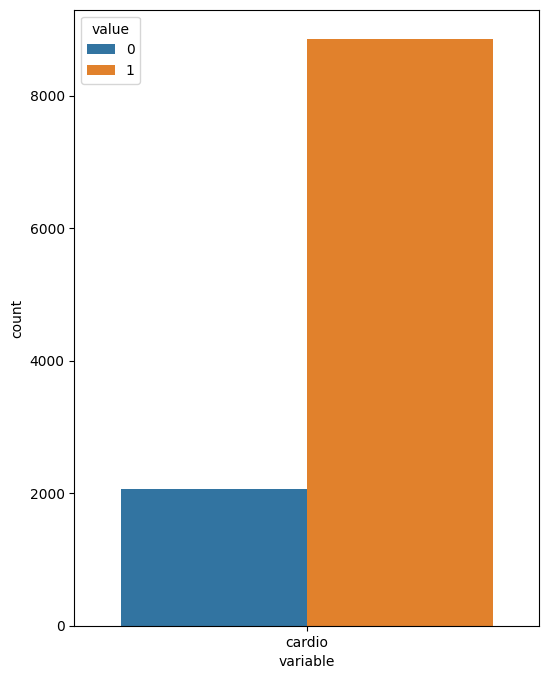

In [27]:
plt.figure(figsize=(6,8))
dataframe_categorical = data.loc[:,['cardio']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

print ("0 = No Cardio", "1 = Cardio" )

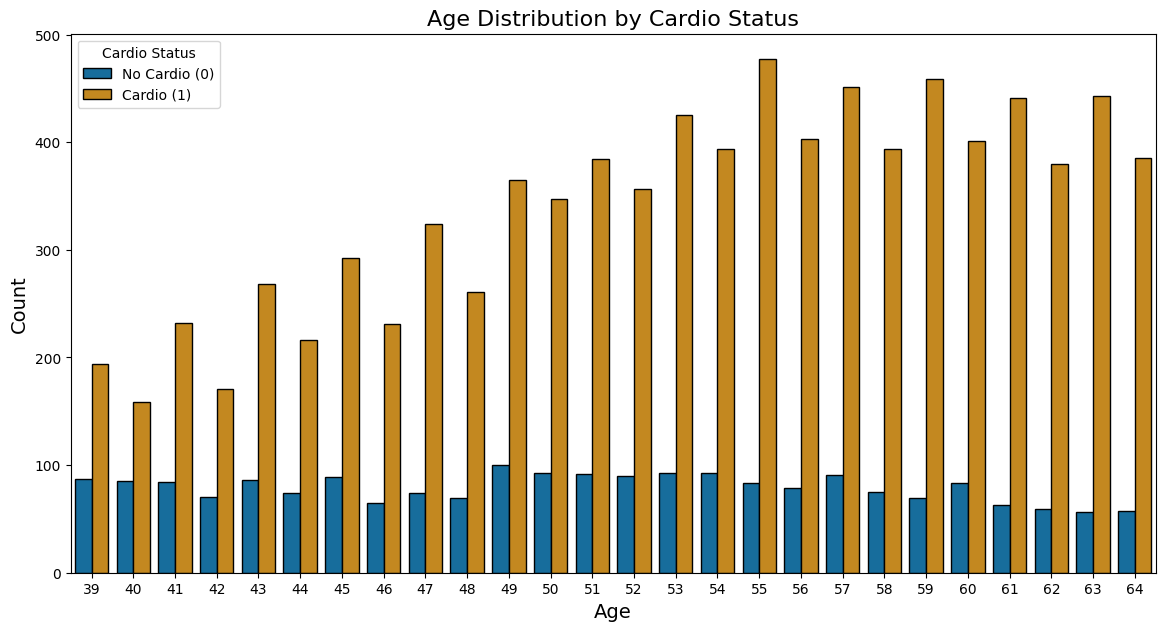

0 = No Cardio 1 = Cardio


In [28]:
plt.figure(figsize=(14, 7))
sns.countplot(
    x='Age',
    hue='cardio',
    data=data,
    palette='colorblind',
    edgecolor='black'  # Use a single color for edge color or remove this argument
)
plt.title("Age Distribution by Cardio Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Cardio Status", labels=["No Cardio (0)", "Cardio (1)"])
plt.show()

print("0 = No Cardio", "1 = Cardio")


In [29]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [30]:
continous_val

['BMI', 'Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

In [31]:
categorical_val

['cardio']

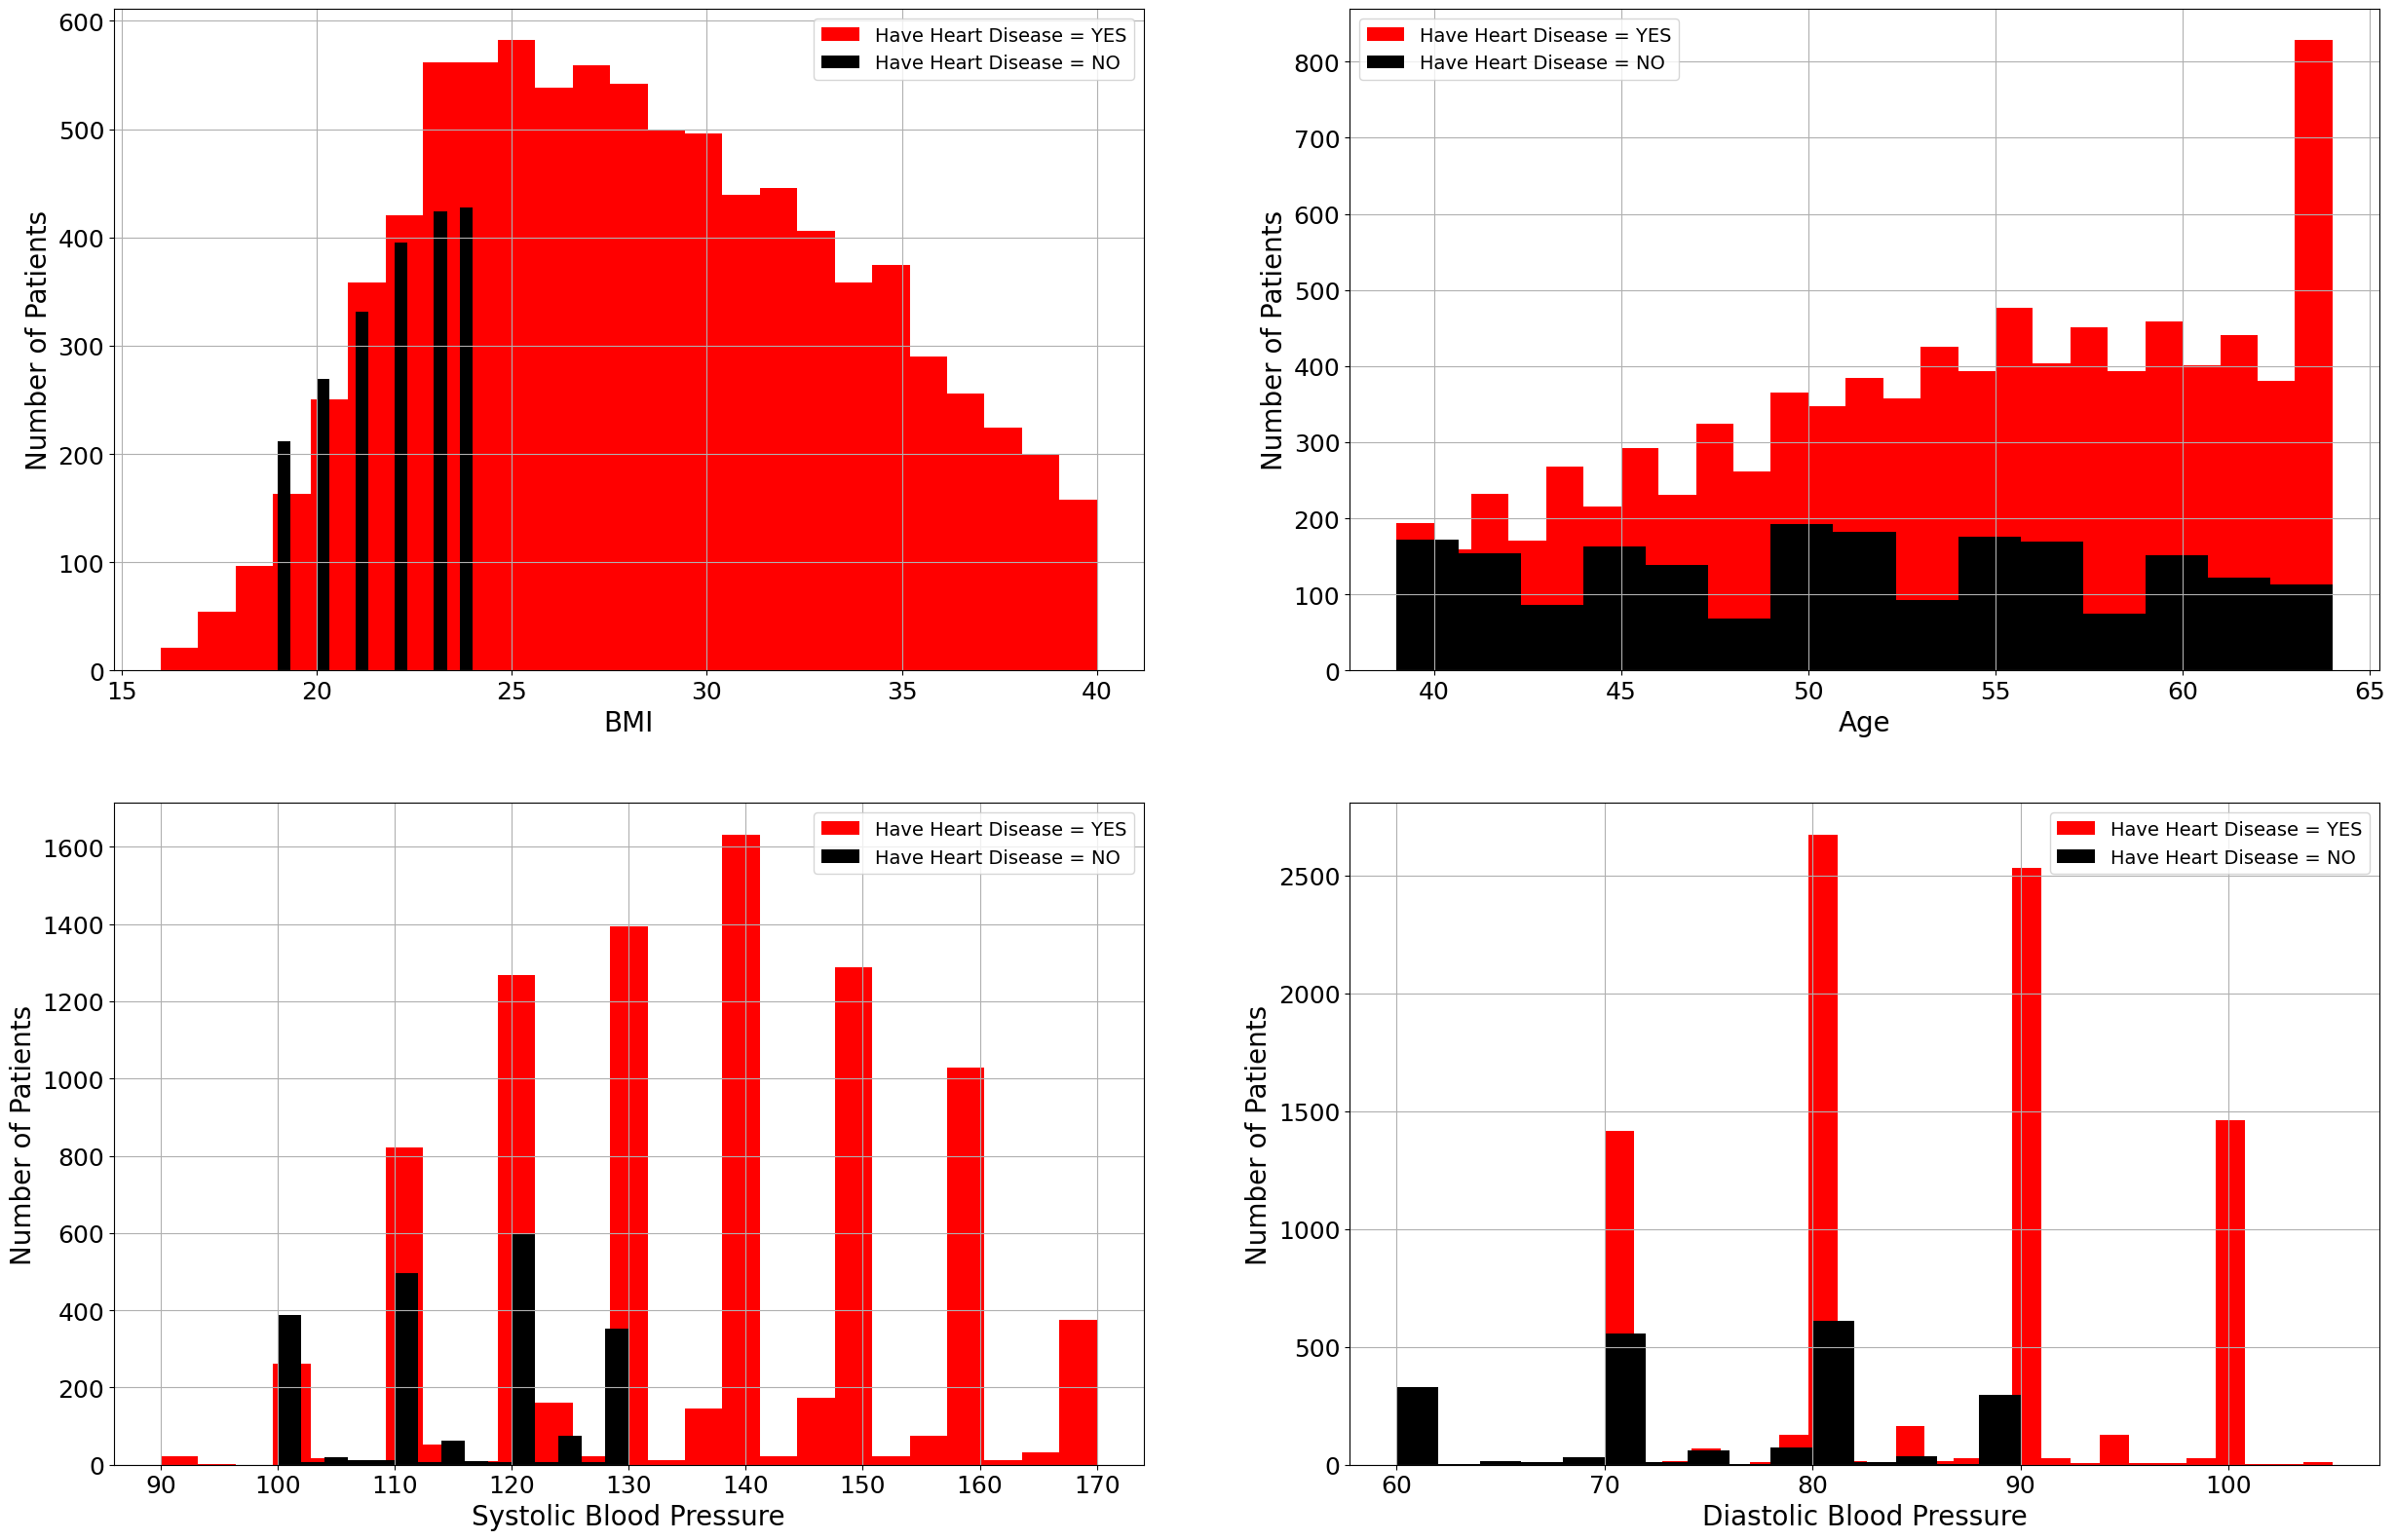

In [32]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val,1):
    plt.subplot(3, 2, i)
    data[data["cardio"] == 1][column].hist(bins=25, color='Red', label='Have Heart Disease = YES', alpha=1)
    data[data["cardio"] == 0][column].hist(bins=15, color='Black', label='Have Heart Disease = NO', alpha=1)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Number of Patients" ,fontsize=20)

In [33]:
data.corr()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
cardio,1.00,0.45,0.13,0.45,0.38
BMI,0.45,1.00,0.08,0.29,0.26
Age,0.13,0.08,1.00,0.11,0.05
Systolic Blood Pressure,0.45,0.29,0.11,1.00,0.60
Diastolic Blood Pressure,0.38,0.26,0.05,0.60,1.00


# Multivariate Analysis & Correlation Detection

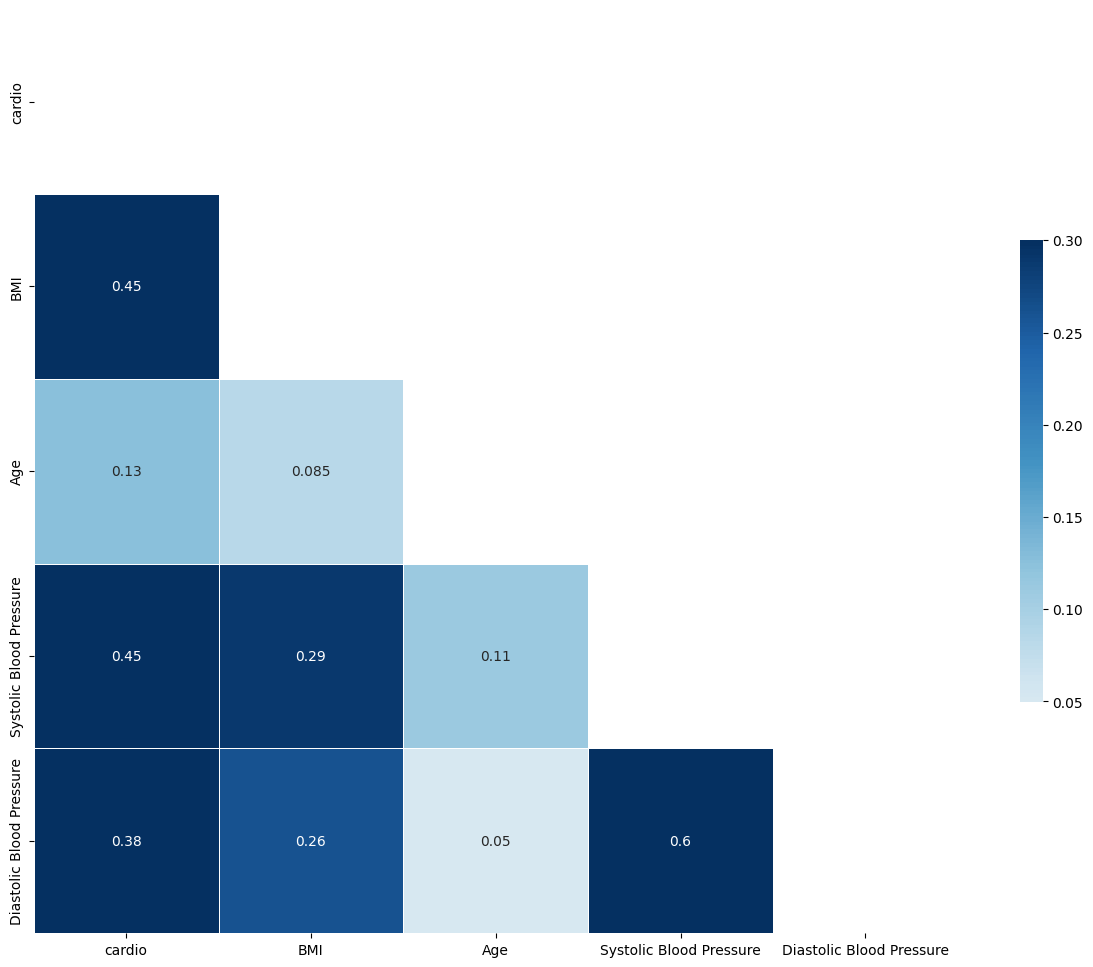

In [34]:
# Multivariate Analysis & Correlation Detection
import seaborn as sb
correl = data.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (16, 12))

sb.heatmap(correl, mask = mask, cmap ='RdBu', vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [35]:
categorical_val.remove('cardio')
dataset = pd.get_dummies(data, columns = categorical_val)

In [36]:
dataset

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,21,50,110,80
4,0,23,47,100,60
11,0,20,51,120,80
12,0,22,40,120,80
17,0,20,45,110,70
...,...,...,...,...,...
69933,1,26,55,110,80
69934,1,34,43,120,90
69947,1,38,63,110,80
69949,1,24,60,167,85


## **Probability and Statistics**

In [37]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=140 or y<=90:
        return "high 2"
    else:
        return None

data.insert(1,"bp_cat", data.apply(lambda row: BPCategorize(row['Systolic Blood Pressure'], row['Diastolic Blood Pressure']), axis=1))
data['bp_cat'].value_counts()


,count
bp_cat,
high 1,4125
normal,3442
high 2,2016
elevated,203


**Probability that a person has cardio diseases given that he is 50 or older**

In [38]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=39')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

81.13

In [39]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=40')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

81.45

In [40]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=41')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

81.83

In [41]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=42')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

82.1

In [42]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=43')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

82.37

In [43]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=44')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

82.62

In [44]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=45')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

82.88

In [45]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=46')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.15

In [46]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=47')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.33

In [47]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=48')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.42

In [48]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=49')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.6

In [49]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=50')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.93

In [50]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=51')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

84.25

In [51]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=52')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

84.52

In [52]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=53')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

84.87

In [53]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=54')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

85.14

In [54]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=55')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

85.55

In [55]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=56')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

85.6

In [56]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=57')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

85.85

In [57]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=58')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

86.27

In [58]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=59')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

86.64

In [59]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=60')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

86.57

In [60]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=61')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

87.53

In [61]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=62')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

87.54

In [62]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=63')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

87.99

In [63]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=64')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

87.1

**Probability that a person has cardio diseases given that he has body mass index greater than 37**

In [64]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=15')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

81.13

In [65]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=16')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

81.13

In [66]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=17')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

81.1

In [67]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=18')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

81.0

In [68]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=19')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

80.83

In [69]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=20')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

82.18

In [70]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=21')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

83.97

In [71]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=22')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

86.38

In [72]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=23')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

89.79

In [73]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=24')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

94.18

In [74]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=25')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

100.0

**Probability that a person has cardio diseases given that the patient has a hypertensive crisis**

In [75]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high3 = data.query("bp_cat == 'normal'")
data_high_cardio = data_high3.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high3.shape[0],2)

59.21

In [76]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high3 = data.query("bp_cat == 'elevated'")
data_high_cardio = data_high3.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high3.shape[0],2)

62.56

In [77]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high3 = data.query("bp_cat == 'high 1'")
data_high_cardio = data_high3.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high3.shape[0],2)

85.96

In [78]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high3 = data.query("bp_cat == 'high 2'")
data_high_cardio = data_high3.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high3.shape[0],2)

100.0

In [79]:
print(data.columns)
print(dataset.columns)

Index(['cardio', 'bp_cat', 'BMI', 'Age', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure'],
      dtype='object')
Index(['cardio', 'BMI', 'Age', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure'],
      dtype='object')


# Data Transform into StandardScaler

In [80]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI', 'Age']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [81]:
dataset

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,-1.09,-0.40,-1.21,-0.31
4,0,-0.74,-0.83,-1.75,-2.24
11,0,-1.27,-0.26,-0.66,-0.31
12,0,-0.91,-1.82,-0.66,-0.31
17,0,-1.27,-1.11,-1.21,-1.27
...,...,...,...,...,...
69933,1,-0.21,0.30,-1.21,-0.31
69934,1,1.20,-1.39,-0.66,0.66
69947,1,1.91,1.43,-1.21,-0.31
69949,1,-0.56,1.01,1.88,0.17


## **Model Prepration**

In [82]:
from sklearn.model_selection import train_test_split

X = dataset.drop("cardio", axis = 1)

y = dataset["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, shuffle=True)

In [83]:
print('Train set shape is',format(X_train.shape))
print('Test set shape is',format(X_test.shape))

Train set shape is (7639, 4)
Test set shape is (3274, 4)


In [84]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 0. XGBoost Classifer

In [85]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.90%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.80    0.96      0.93       0.88          0.93
recall       0.85    0.95      0.93       0.90          0.93
f1-score     0.82    0.96      0.93       0.89          0.93
support   1463.00 6176.00      0.93    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1238  225]
 [ 317 5859]]

Test Result:
Accuracy Score: 85.74%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.60    0.92      0.86       0.76          0.86
recall      0.62    0.91      0.86       0.77          0.86
f1-score    0.61    0.91      0.86       0.76          0.86
support   596.00 2678.00      0.86    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 372  224]
 [ 

# Confusion Matrix

Confusion Matrix for Training

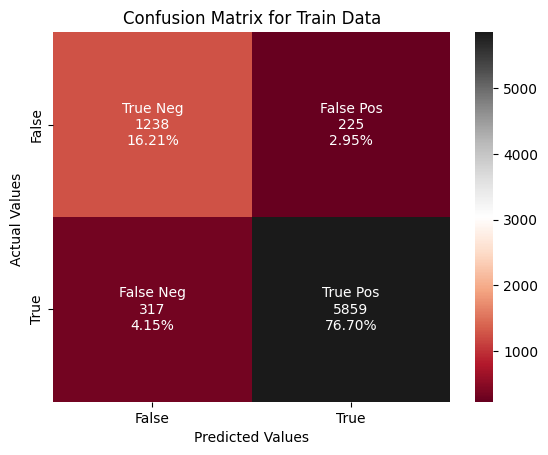

In [86]:
y_pred = xgb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

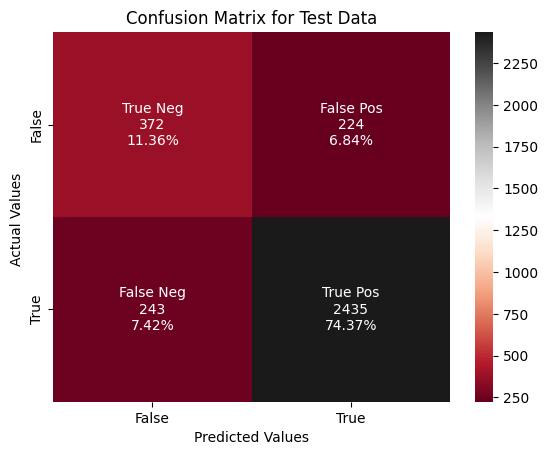

In [87]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9815256242938953

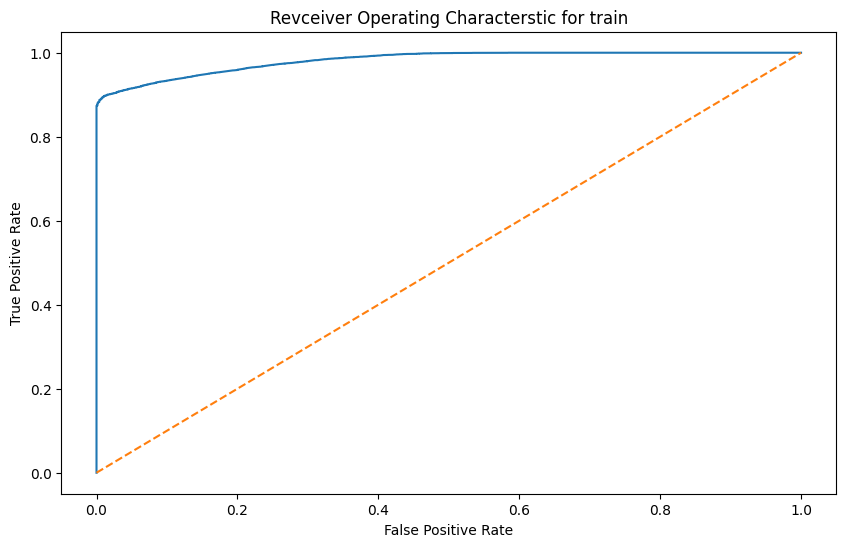

In [89]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9428502689074788

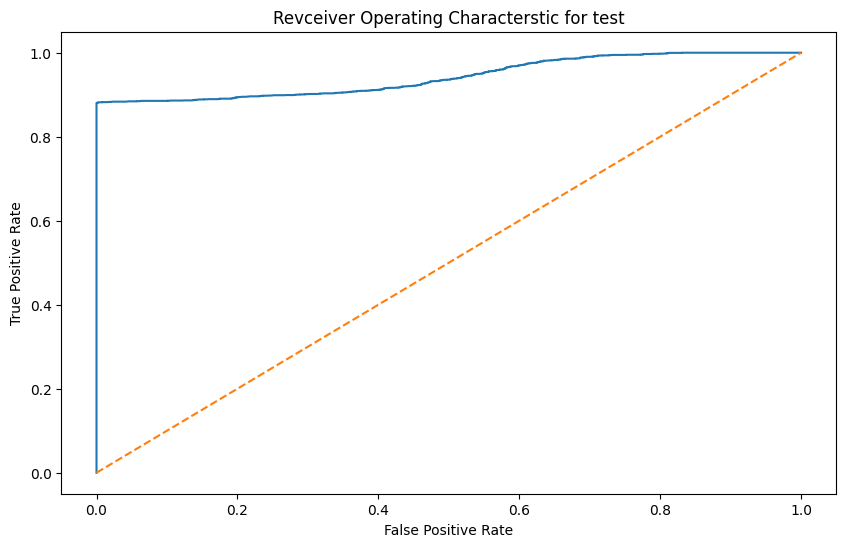

In [91]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [92]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["XGBoost", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74


## 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.98%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.66    0.90      0.86       0.78          0.85
recall       0.56    0.93      0.86       0.74          0.86
f1-score     0.60    0.91      0.86       0.76          0.86
support   1463.00 6176.00      0.86    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[ 817  646]
 [ 425 5751]]

Test Result:
Accuracy Score: 87.05%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.68    0.90      0.87       0.79          0.86
recall      0.56    0.94      0.87       0.75          0.87
f1-score    0.61    0.92      0.87       0.77          0.87
support   596.00 2678.00      0.87    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 331  265]
 [ 

# Confusion Matrix

Confusion Matrix for Training

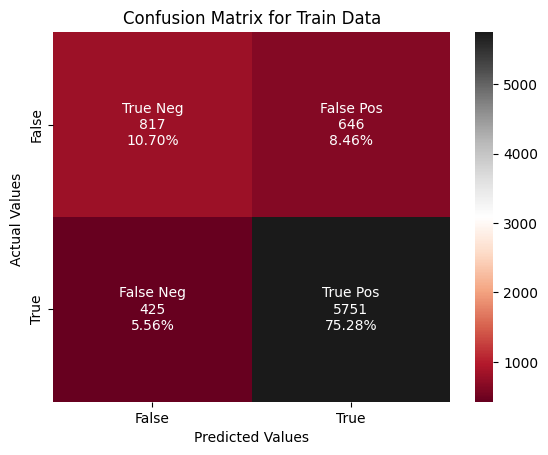

In [94]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

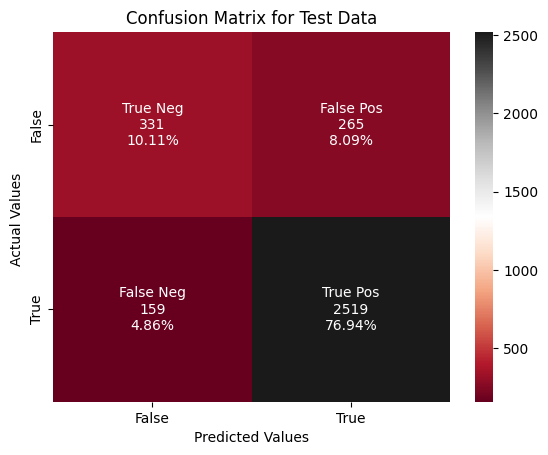

In [95]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9272576091075546

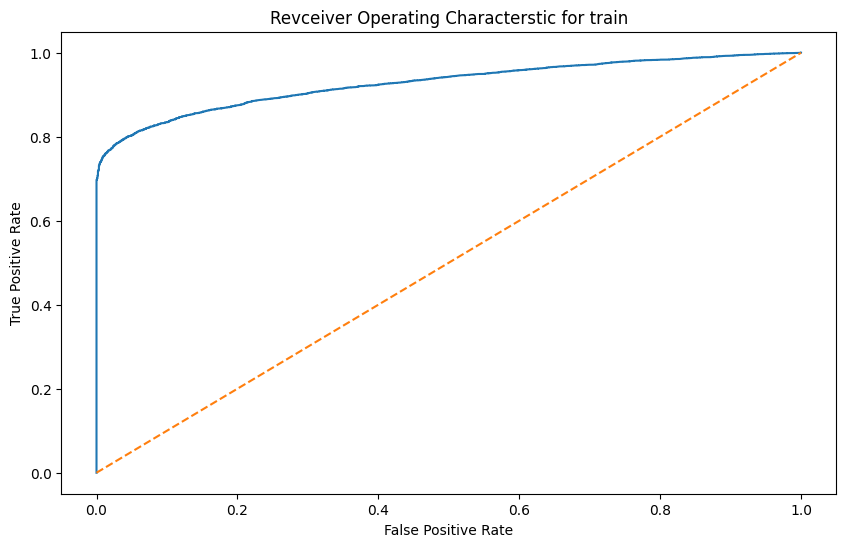

In [97]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9325212644916822

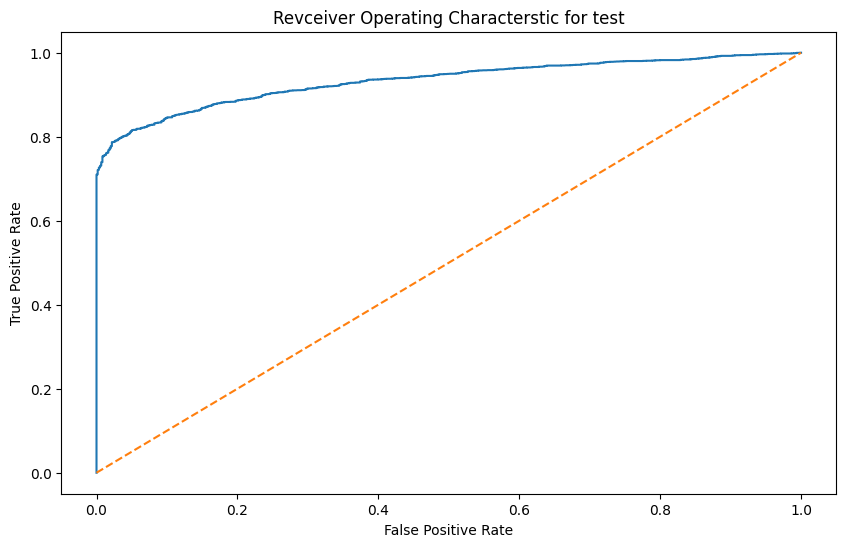

In [99]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05


# 2. LGBMClassifier

In [101]:
# Install the lightgbm package
%pip install lightgbm

In [102]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,)
lgbmc_clf.fit(X_train, y_train)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Unknown parameter: int
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: int
[LightGBM] [Info] Number of positive: 6176, number of negative: 1463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 7639, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.808483 -> initscore=1.440182
[LightGBM] [Info] Start training from score 1.440182
[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 92.05%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.76    0.96      0.92       0.86          0.93
recall       0.85    0.94      0.92       0.90          0.92
f1-score  

# Confusion Matrix

Confusion Matrix for Training

[LightGBM] [Warning] Unknown parameter: int


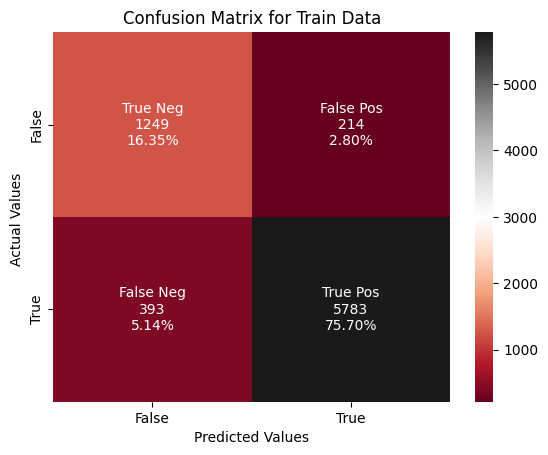

In [103]:
y_pred = lgbmc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

[LightGBM] [Warning] Unknown parameter: int


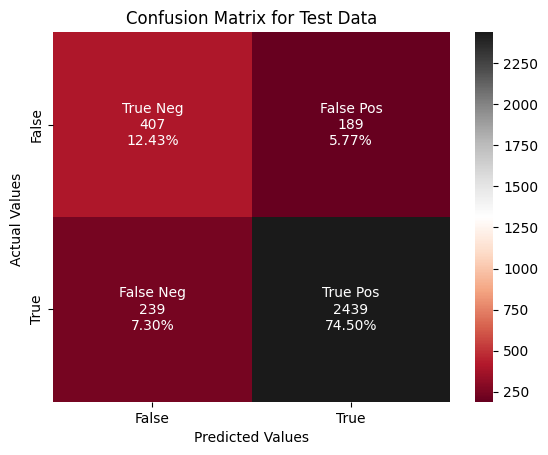

In [104]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

[LightGBM] [Warning] Unknown parameter: int


0.9762865049458314

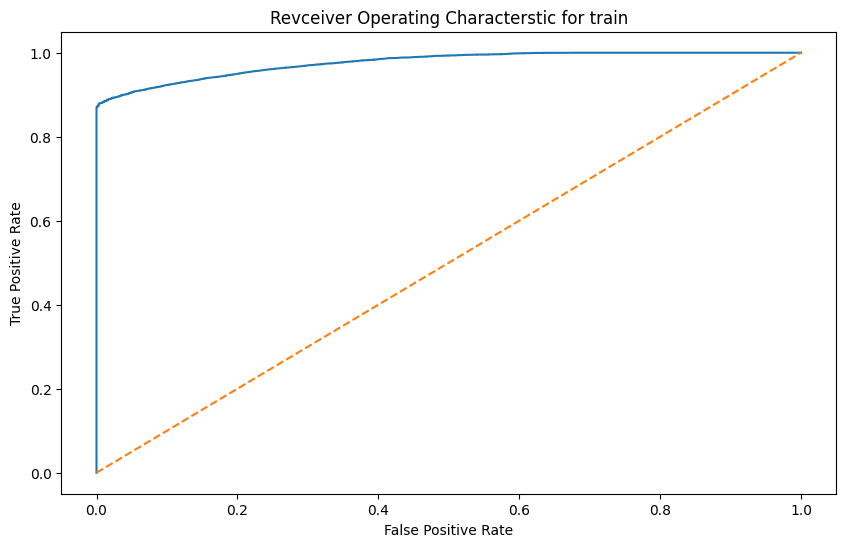

In [106]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

[LightGBM] [Warning] Unknown parameter: int


0.9480166507109884

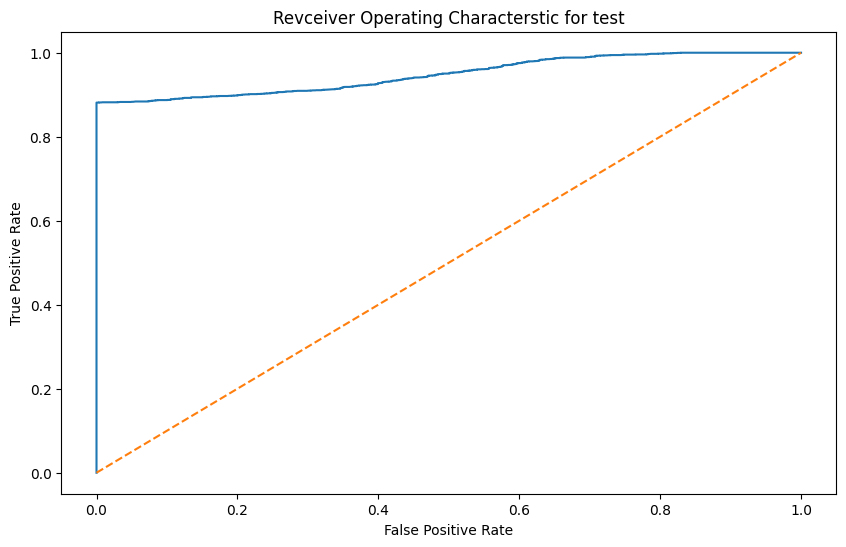

In [108]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [109]:
test_score = accuracy_score(y_test, lgbmc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbmc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBM", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

[LightGBM] [Warning] Unknown parameter: int
[LightGBM] [Warning] Unknown parameter: int


,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93


## 3. K-nearest neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.81%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.68    0.95      0.89       0.81          0.90
recall       0.78    0.91      0.89       0.85          0.89
f1-score     0.73    0.93      0.89       0.83          0.89
support   1463.00 6176.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1144  319]
 [ 536 5640]]

Test Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.67    0.94      0.89       0.81          0.89
recall      0.74    0.92      0.89       0.83          0.89
f1-score    0.71    0.93      0.89       0.82          0.89
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 444  152]
 [ 

# Confusion Matrix

Confusion Matrix for Training

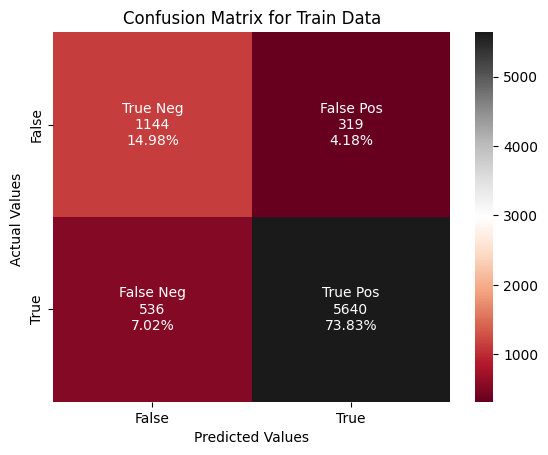

In [111]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

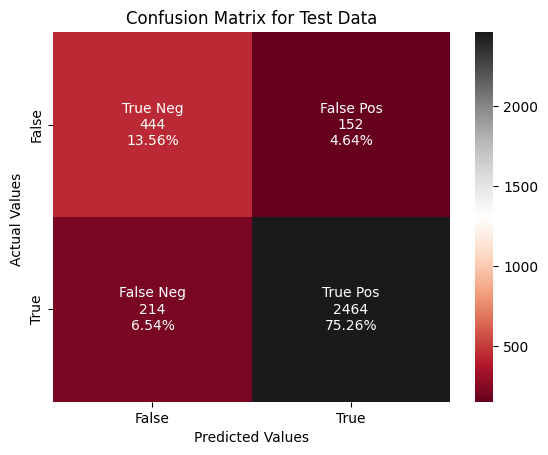

In [112]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9533326257530307

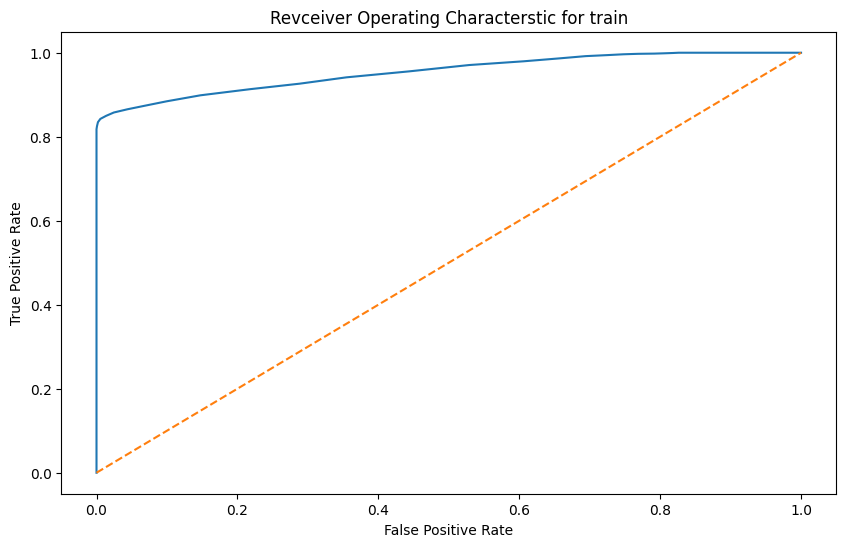

In [114]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9523068276937111

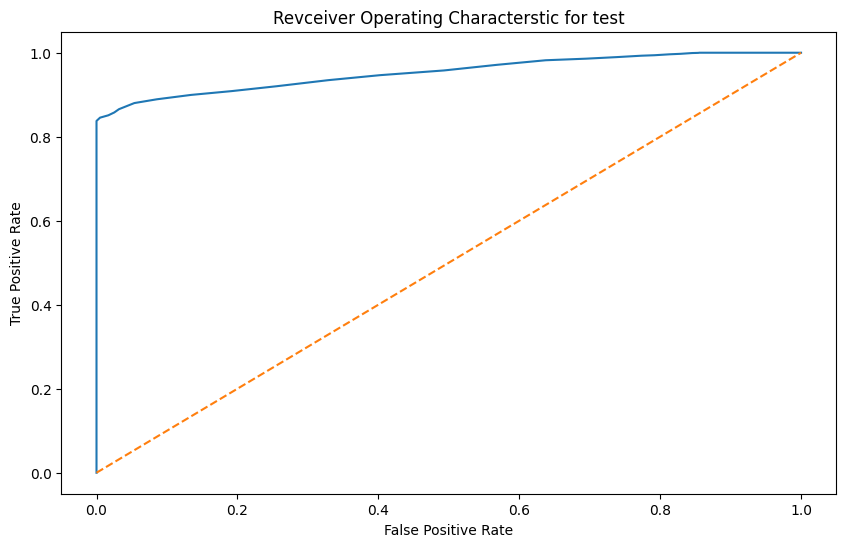

In [116]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

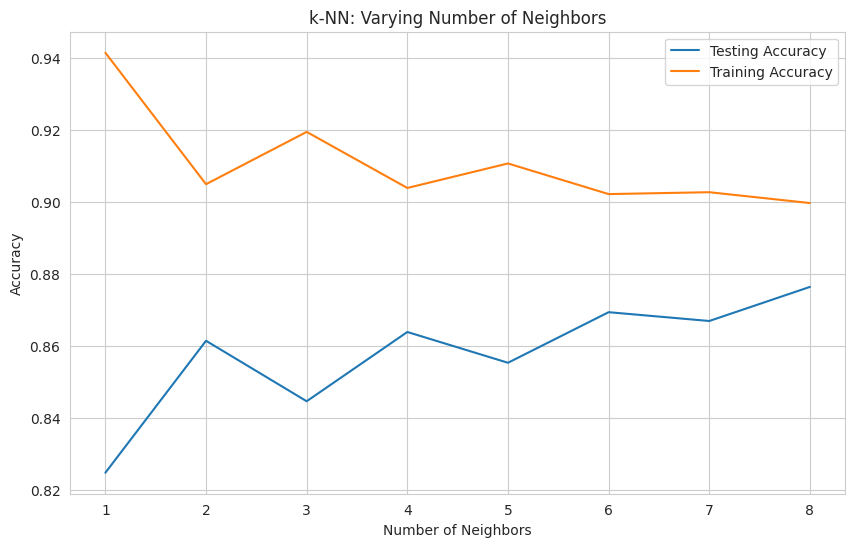

In [117]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [118]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63


## 4. GaussianNB

In [119]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

print_score(gnb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gnb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.27%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.66    0.95      0.88       0.80          0.90
recall       0.82    0.90      0.88       0.86          0.88
f1-score     0.73    0.93      0.88       0.83          0.89
support   1463.00 6176.00      0.88    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1198  265]
 [ 631 5545]]

Test Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.66    0.96      0.89       0.81          0.90
recall      0.82    0.90      0.89       0.86          0.89
f1-score    0.73    0.93      0.89       0.83          0.89
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 489  107]
 [ 

# Confusion Matrix

Confusion Matrix for Training

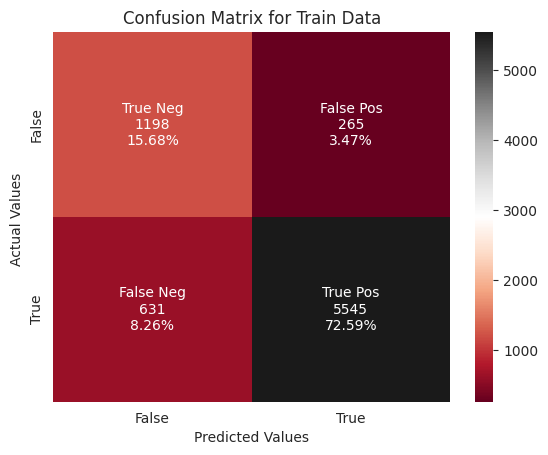

In [120]:
y_pred = gnb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

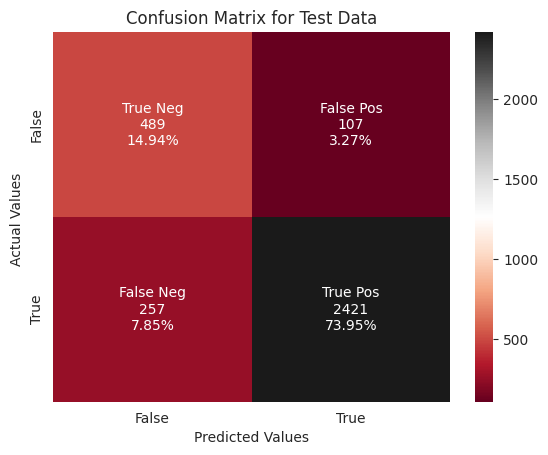

In [121]:
y_pred = gnb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gnb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gnb_clf,true_positive_rate_gnb_clf,threshold_gnb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9455528024606972

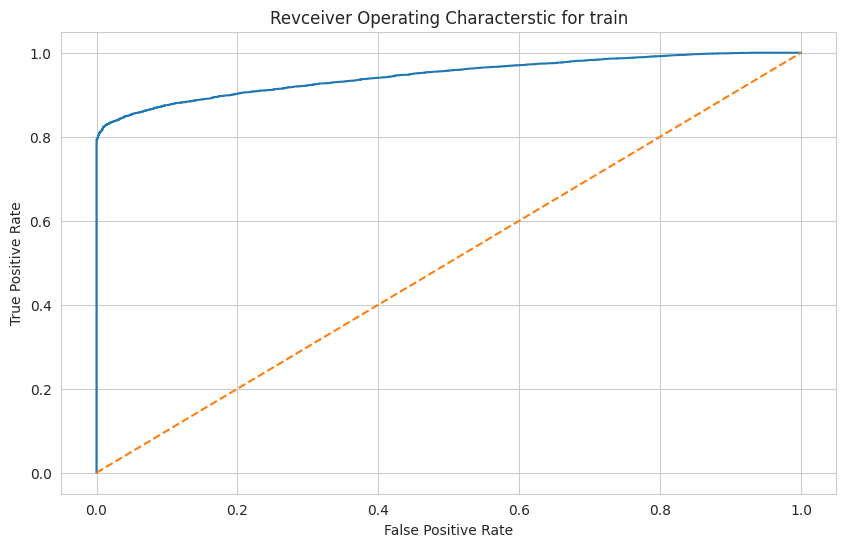

In [123]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_gnb_clf,true_positive_rate_gnb_clf,linestyle='-',label='GaussianNB')
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gnb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gnb_clf,true_positive_rate_gnb_clf,threshold_gnb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.949079248763226

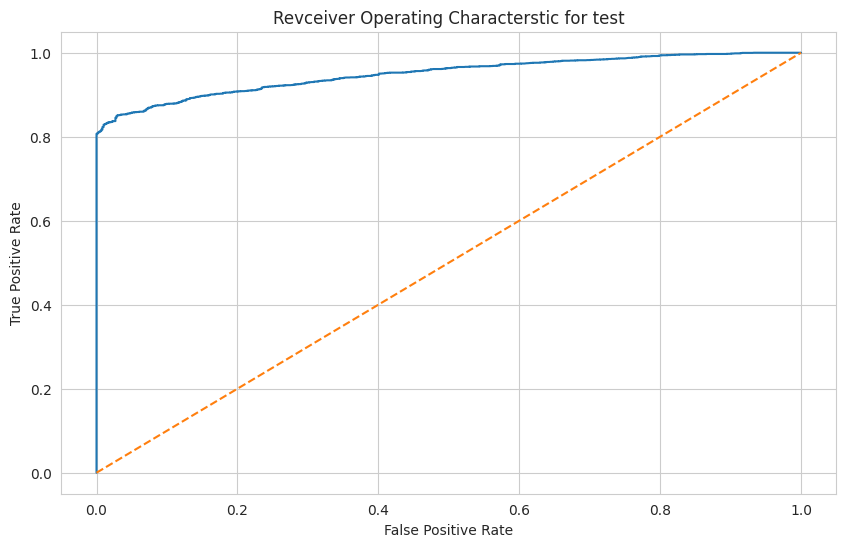

In [125]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_gnb_clf,true_positive_rate_gnb_clf,linestyle='-',label='GaussianNB')
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [126]:
test_score = accuracy_score(y_test, gnb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gnb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GaussianNB", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88


## 5. Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.21%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.67    0.97      0.89       0.82          0.91
recall       0.87    0.90      0.89       0.88          0.89
f1-score     0.76    0.93      0.89       0.84          0.90
support   1463.00 6176.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1274  189]
 [ 635 5541]]

Test Result:
Accuracy Score: 89.19%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.66    0.96      0.89       0.81          0.91
recall      0.85    0.90      0.89       0.88          0.89
f1-score    0.74    0.93      0.89       0.84          0.90
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 506   90]
 [ 

# Confusion Matrix

Confusion Matrix for Training

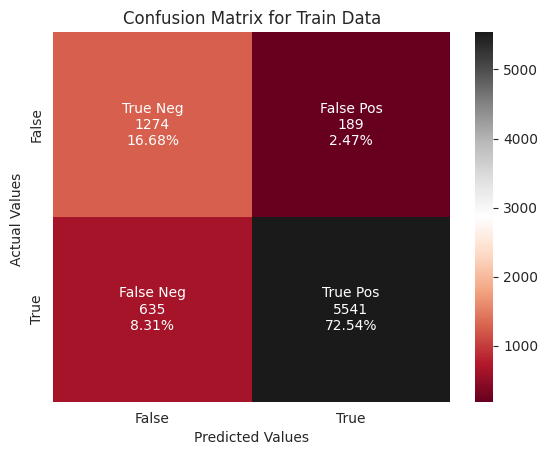

In [128]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

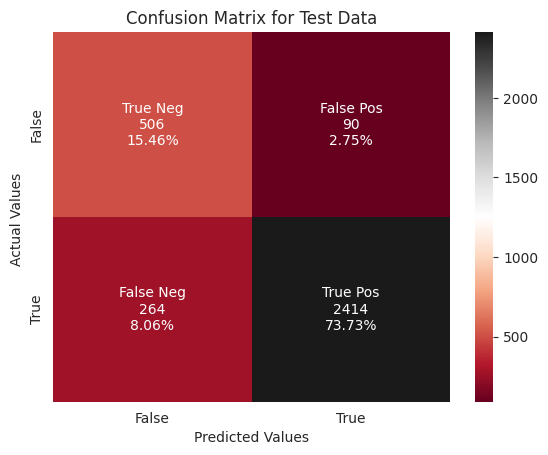

In [129]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9555669267669882

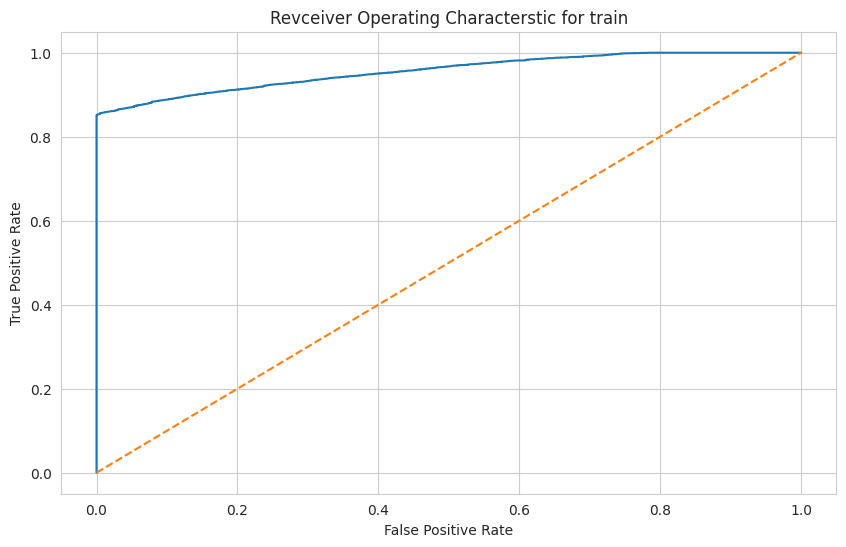

In [131]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9559281819047571

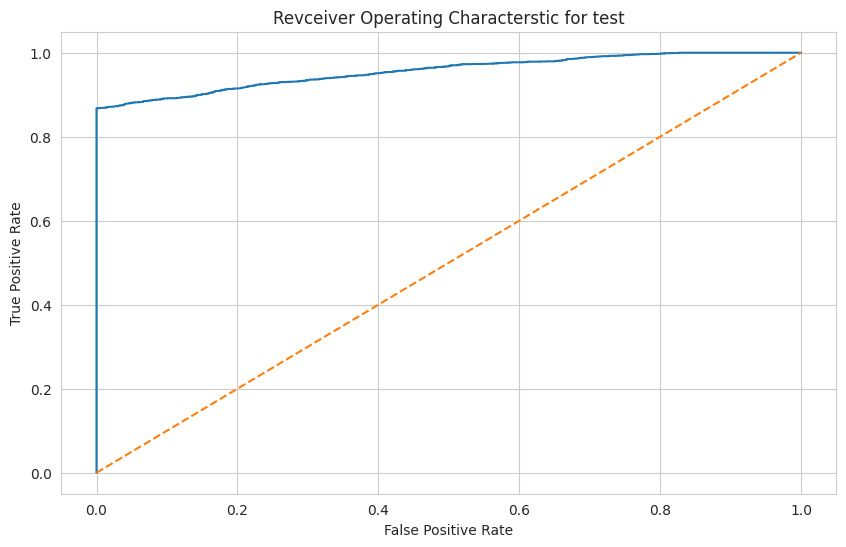

In [133]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [134]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19


## 6. DecisionTreeClassifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.94%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.66    0.97      0.89       0.81          0.91
recall       0.88    0.89      0.89       0.88          0.89
f1-score     0.75    0.93      0.89       0.84          0.89
support   1463.00 6176.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1281  182]
 [ 663 5513]]

Test Result:
Accuracy Score: 89.25%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.66    0.96      0.89       0.81          0.91
recall      0.84    0.90      0.89       0.87          0.89
f1-score    0.74    0.93      0.89       0.84          0.90
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 503   93]
 [ 

# Confusion Matrix

Confusion Matrix for Training

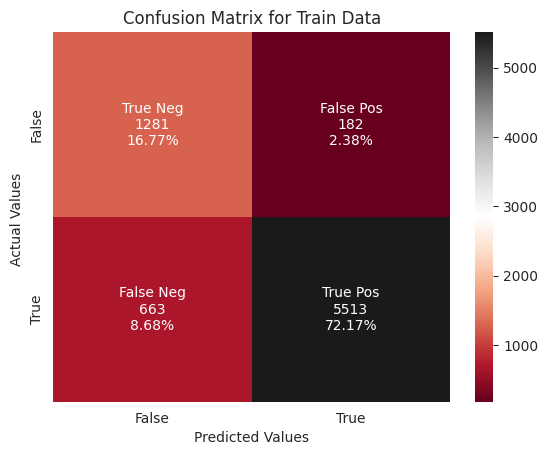

In [136]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

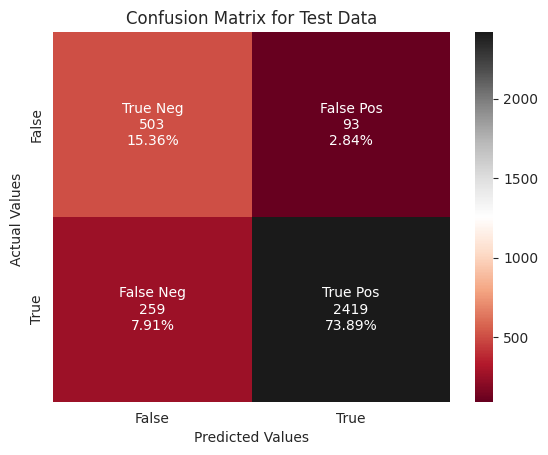

In [137]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9552202935801586

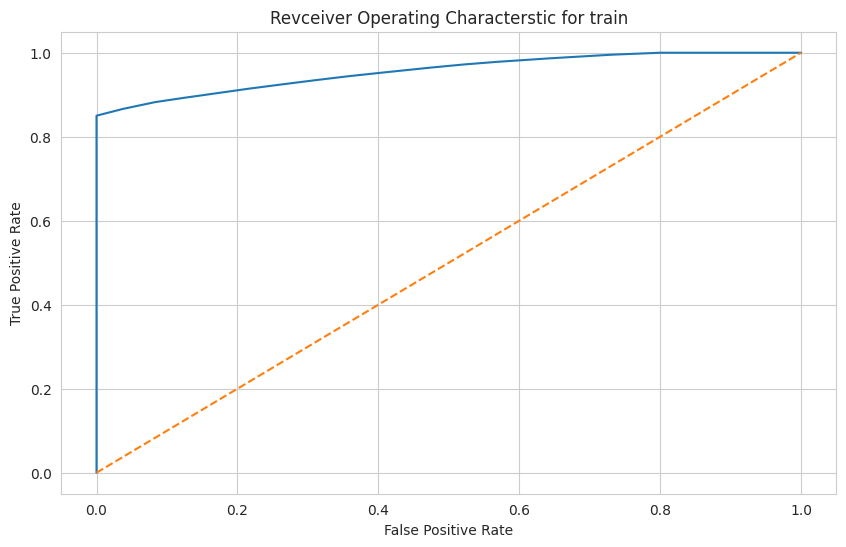

In [139]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9538380715850254

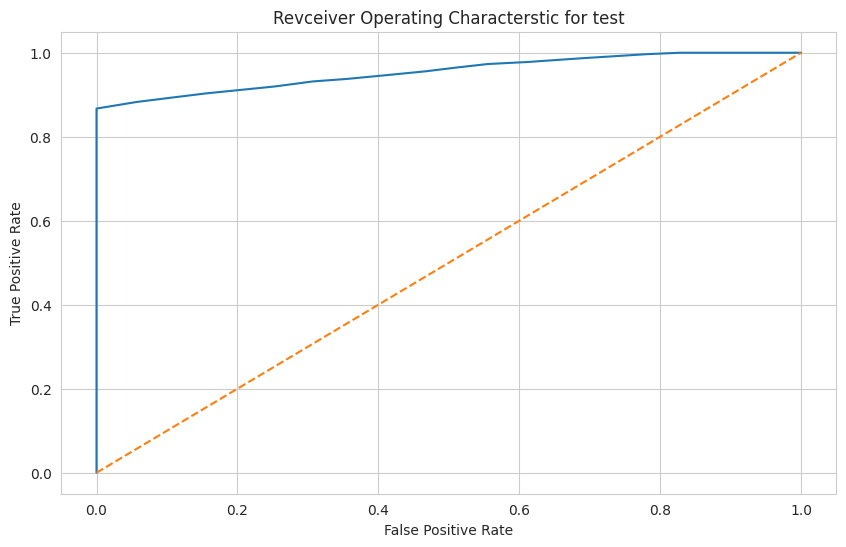

In [141]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [142]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25


# 7. ExtraTreesClassifier

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=100,max_depth=10)
etc_clf.fit(X_train, y_train)

print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.84%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.73    0.94      0.90       0.84          0.90
recall       0.74    0.94      0.90       0.84          0.90
f1-score     0.74    0.94      0.90       0.84          0.90
support   1463.00 6176.00      0.90    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1077  386]
 [ 390 5786]]

Test Result:
Accuracy Score: 89.46%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.72    0.93      0.89       0.83          0.89
recall      0.69    0.94      0.89       0.82          0.89
f1-score    0.70    0.94      0.89       0.82          0.89
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 412  184]
 [ 

# Confusion Matrix

Confusion Matrix for Training

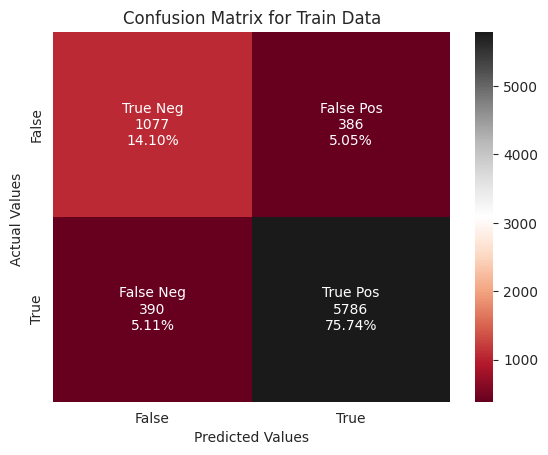

In [144]:
y_pred = etc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

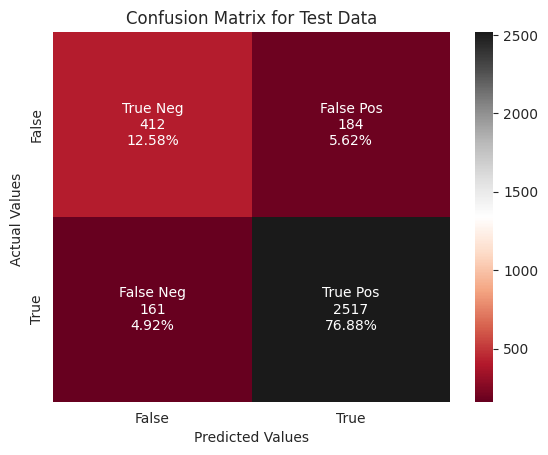

In [145]:
y_pred = etc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [146]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9631996633718068

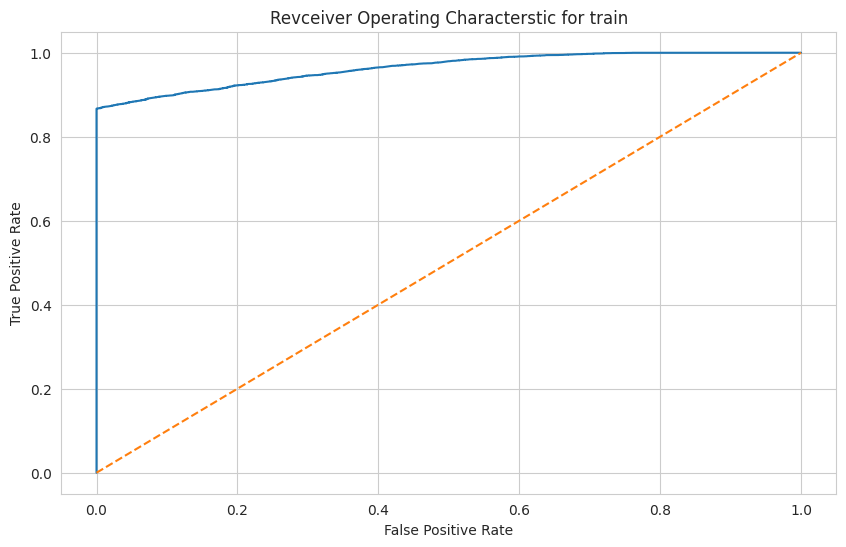

In [147]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [148]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9538380715850254

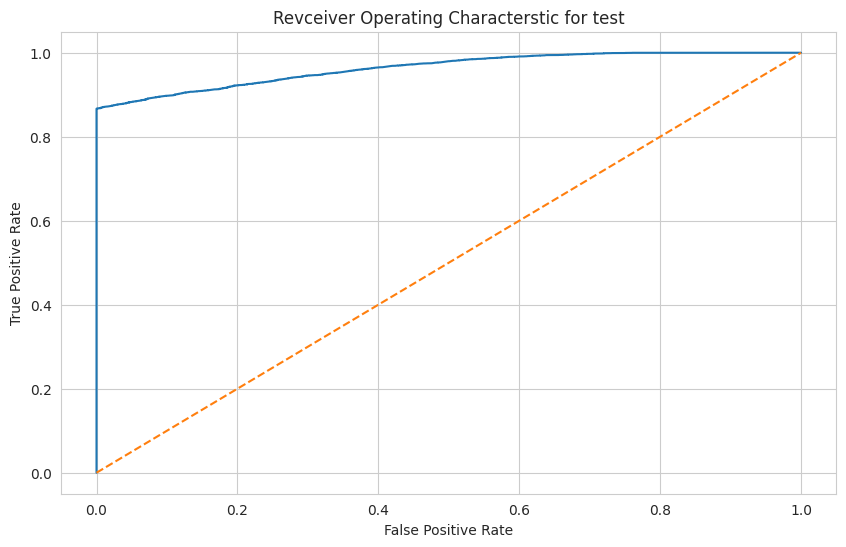

In [149]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [150]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTrees", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25
7,ExtraTrees,89.84,89.46


# 8. AdaBoostClassifier

In [151]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=20,)
ab_clf.fit(X_train, y_train)

print_score(ab_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ab_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.88%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.61    1.00      0.88       0.81          0.93
recall       1.00    0.85      0.88       0.93          0.88
f1-score     0.76    0.92      0.88       0.84          0.89
support   1463.00 6176.00      0.88    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1463    0]
 [ 926 5250]]

Test Result:
Accuracy Score: 89.16%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.63    1.00      0.89       0.81          0.93
recall      1.00    0.87      0.89       0.93          0.89
f1-score    0.77    0.93      0.89       0.85          0.90
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 596    0]
 [ 

# Confusion Matrix

Confusion Matrix for Training

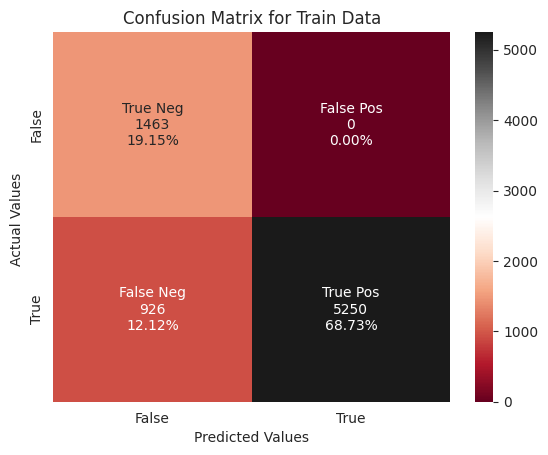

In [152]:
y_pred = ab_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

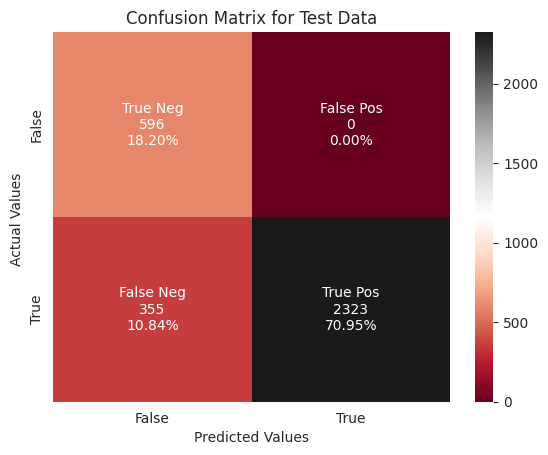

In [153]:
y_pred = ab_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9399951613017471

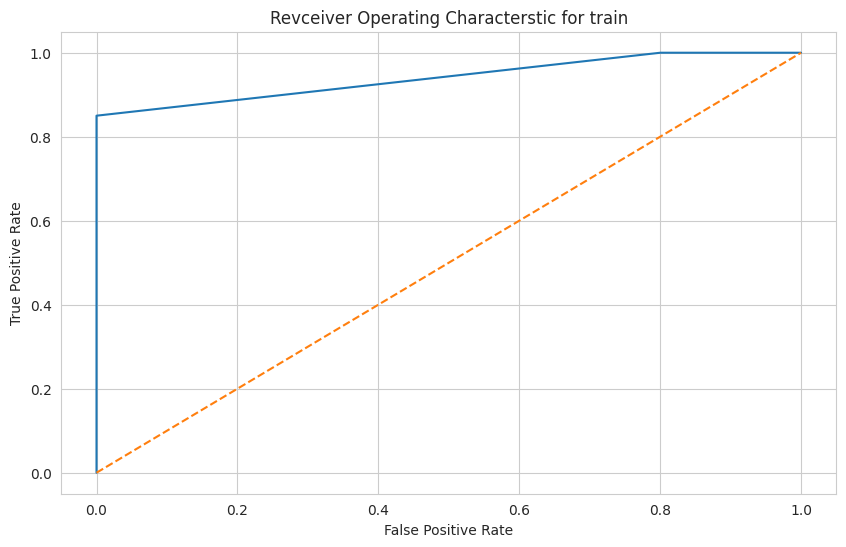

In [155]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [156]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9450625529419431

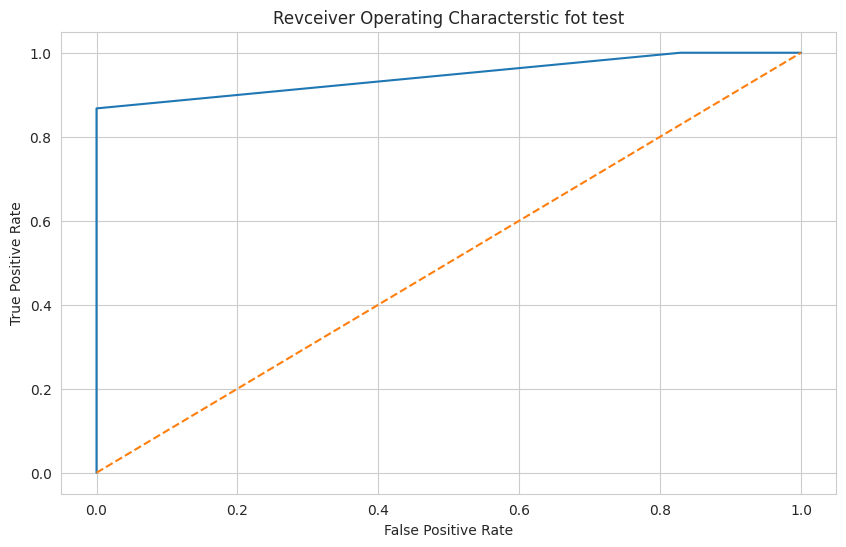

In [157]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic fot test')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [158]:
test_score = accuracy_score(y_test, ab_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ab_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25
7,ExtraTrees,89.84,89.46
8,AdaBoostClassifier,87.88,89.16


# 9. GradientBoostingClassifier

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.41%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.67    0.97      0.89       0.82          0.91
recall       0.88    0.90      0.89       0.89          0.89
f1-score     0.76    0.93      0.89       0.85          0.90
support   1463.00 6176.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1282  181]
 [ 628 5548]]

Test Result:
Accuracy Score: 90.47%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.69    0.97      0.90       0.83          0.92
recall      0.86    0.91      0.90       0.89          0.90
f1-score    0.77    0.94      0.90       0.85          0.91
support   596.00 2678.00      0.90    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 513   83]
 [ 

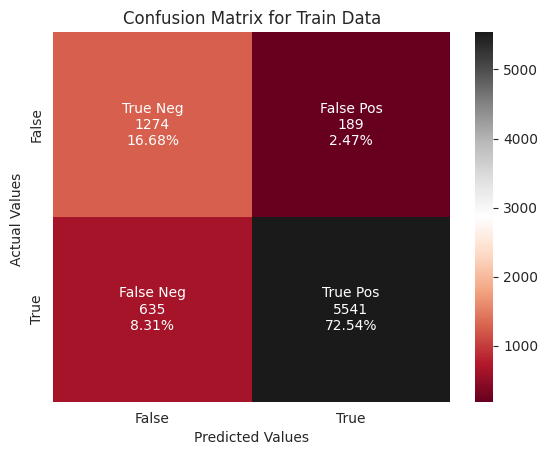

In [160]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion Matrix

Confusion Matrix for Training

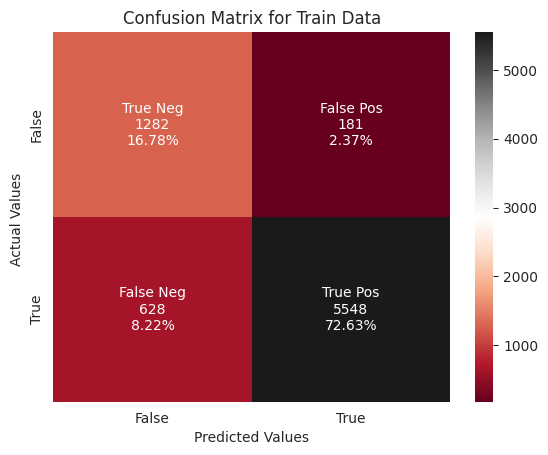

In [161]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

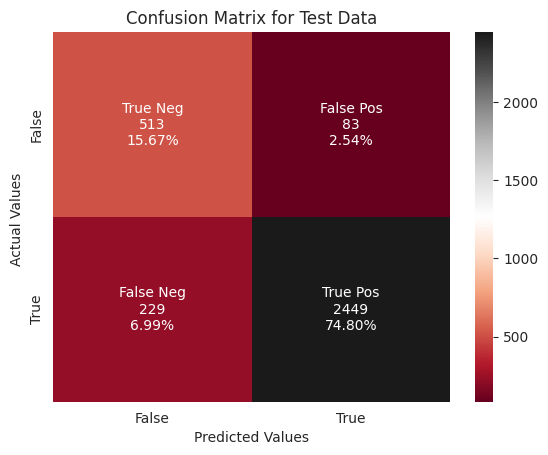

In [162]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [163]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.961234301899355

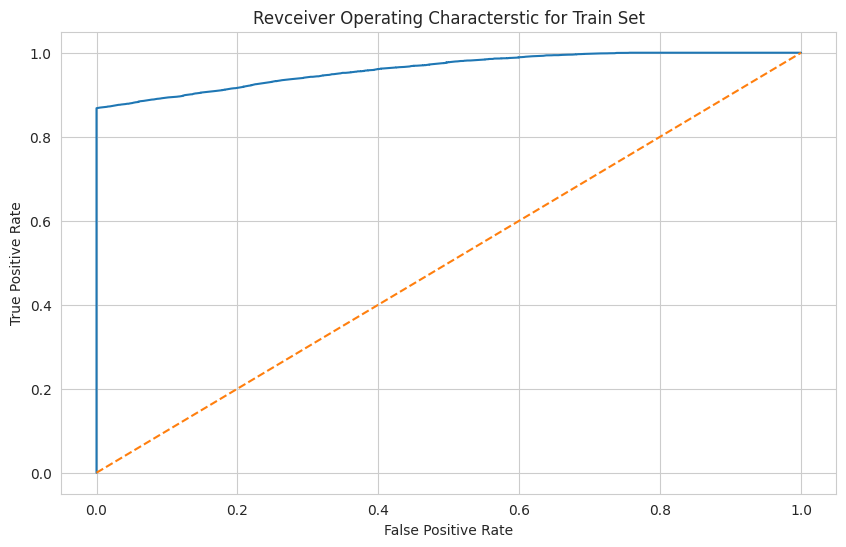

In [164]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for Train Set')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9619381888717915

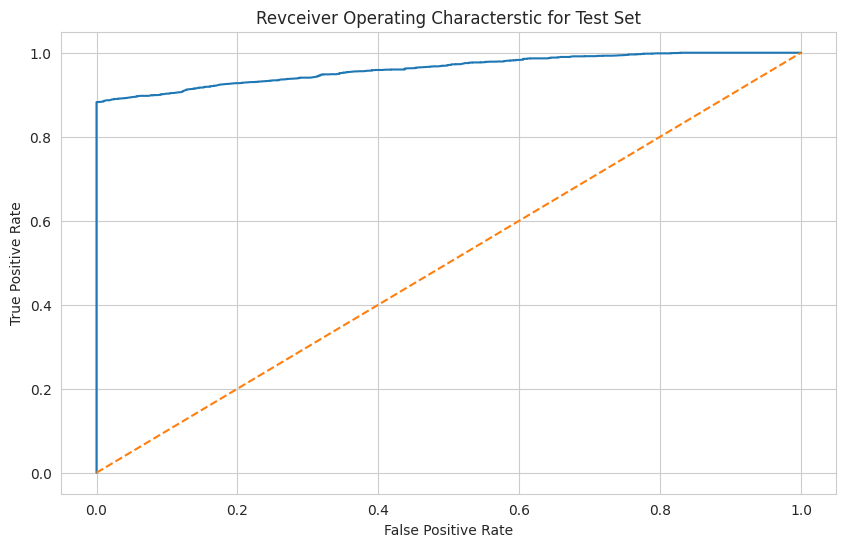

In [166]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for Test Set')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [167]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25
7,ExtraTrees,89.84,89.46
8,AdaBoostClassifier,87.88,89.16
9,GradientBoostingClassifier,89.41,90.47


## 10. Support Vector machine

In [168]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.07%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.68    0.95      0.89       0.82          0.90
recall       0.81    0.91      0.89       0.86          0.89
f1-score     0.74    0.93      0.89       0.84          0.89
support   1463.00 6176.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1184  279]
 [ 556 5620]]

Test Result:
Accuracy Score: 89.46%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.68    0.95      0.89       0.82          0.90
recall      0.78    0.92      0.89       0.85          0.89
f1-score    0.73    0.93      0.89       0.83          0.90
support   596.00 2678.00      0.89    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 465  131]
 [ 

# Confusion Matrix

Confusion Matrix for Training

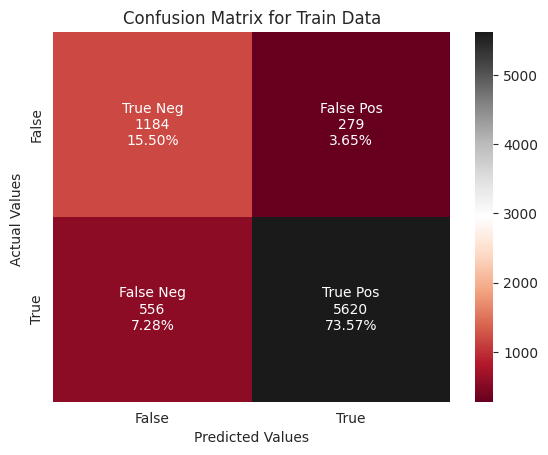

In [169]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

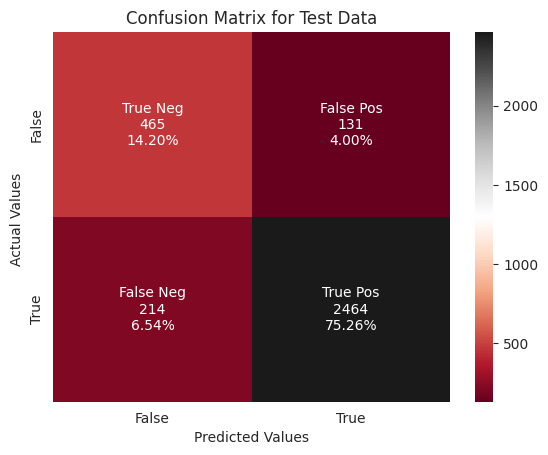

In [170]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9522737454800448

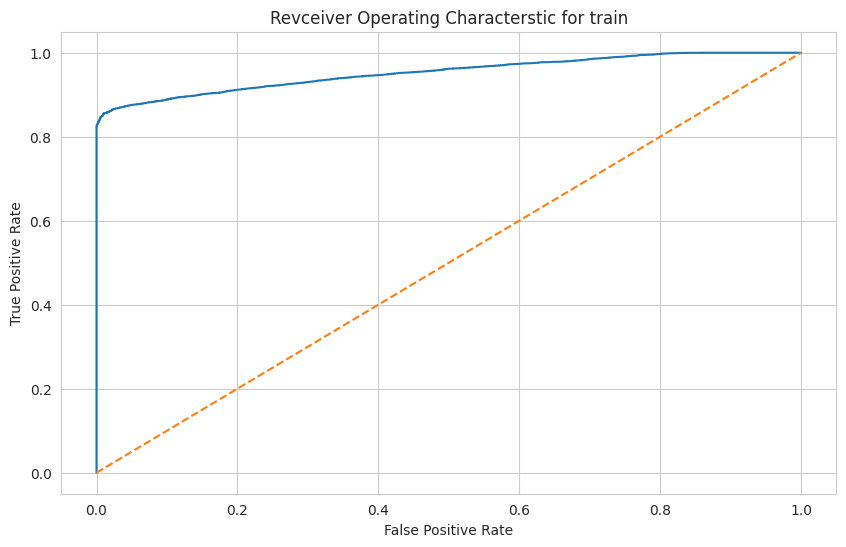

In [172]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9541641814235806

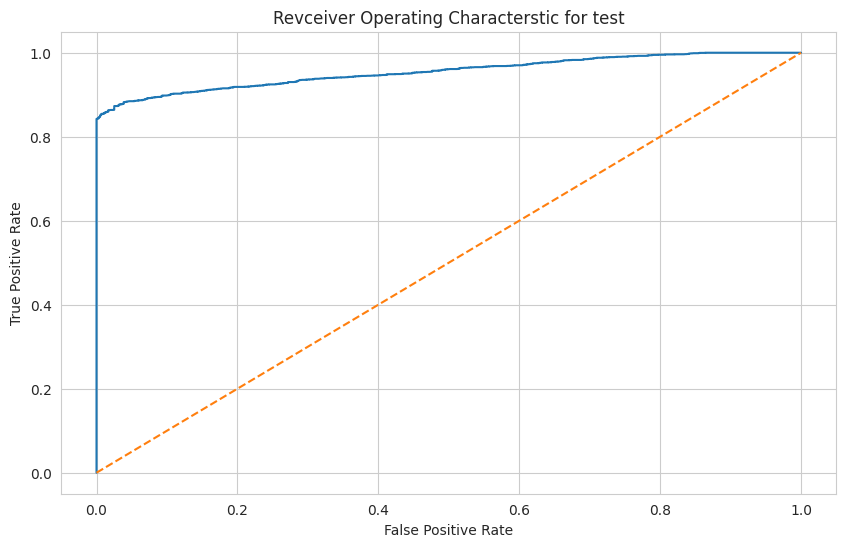

In [174]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [175]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25
7,ExtraTrees,89.84,89.46
8,AdaBoostClassifier,87.88,89.16
9,GradientBoostingClassifier,89.41,90.47


# 11. CatBoostClassifier

In [176]:
!pip install catboost
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(n_estimators=10)
cbc_clf.fit(X_train, y_train)

print_score(cbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cbc_clf, X_train, y_train, X_test, y_test, train=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00
Learning rate set to 0.5
0:	learn: 0.4195702	total: 48.3ms	remaining: 434ms
1:	learn: 0.3126567	total: 50.4ms	remaining: 201ms
2:	learn: 0.2633451	total: 52.1ms	remaining: 122ms
3:	learn: 0.2310262	total: 54ms	remaining: 81ms
4:	learn: 0.2157513	total: 55.7ms	remaining: 55.7ms
5:	learn: 0.2048493	total: 57.7ms	remaining: 38.5ms
6:	learn: 0.1959513	total: 59.4ms	remaining: 25.4ms
7:	learn: 0.1896487	total: 61.2ms	remaining: 15.3ms
8:	learn: 0.1864159	total: 63.1ms	remaining: 7.01ms
9:	learn: 0.1837202	total: 65ms	remaining: 0us
Train Result:
Accuracy Score: 89.24%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.67    0.96      0.89       0.82          0.91
recall       0.85    0.90      0.89       0.87          0.89
f1-score     0.75    0.93      0.89       0.84          0.90
support   1463.00 6176.00      0.89  

# Confusion Matrix

Confusion Matrix for Training

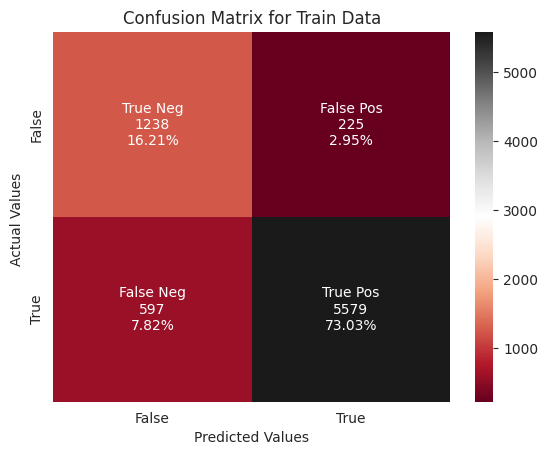

In [177]:
y_pred = cbc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

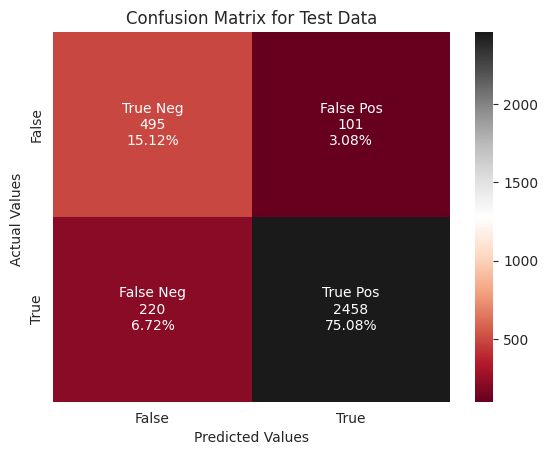

In [178]:
y_pred = cbc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9577018972301219

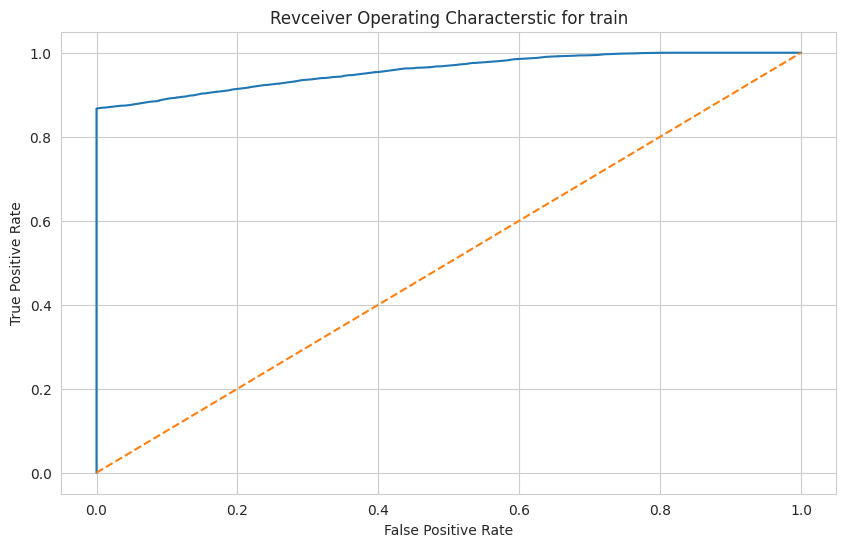

In [180]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [181]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9605748555217507

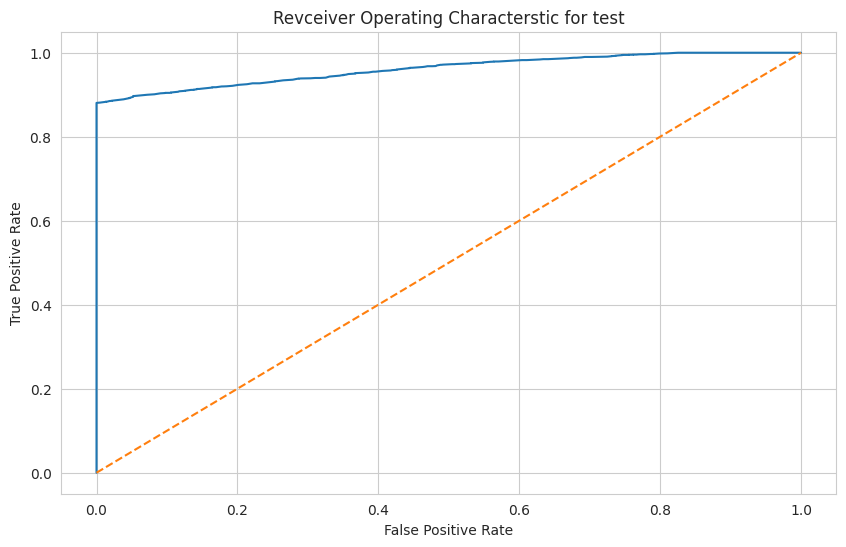

In [182]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [183]:
test_score = accuracy_score(y_test, cbc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cbc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["CatBoostClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost,92.90,85.74
1,LogisticRegression,85.98,87.05
2,LGBM,92.05,86.93
3,K-nearest neighbors,89.96,87.63
4,GaussianNB,88.27,88.88
5,Random Forest Classifier,89.21,89.19
6,Decision Tree,88.94,89.25
7,ExtraTrees,89.84,89.46
8,AdaBoostClassifier,87.88,89.16
9,GradientBoostingClassifier,89.41,90.47


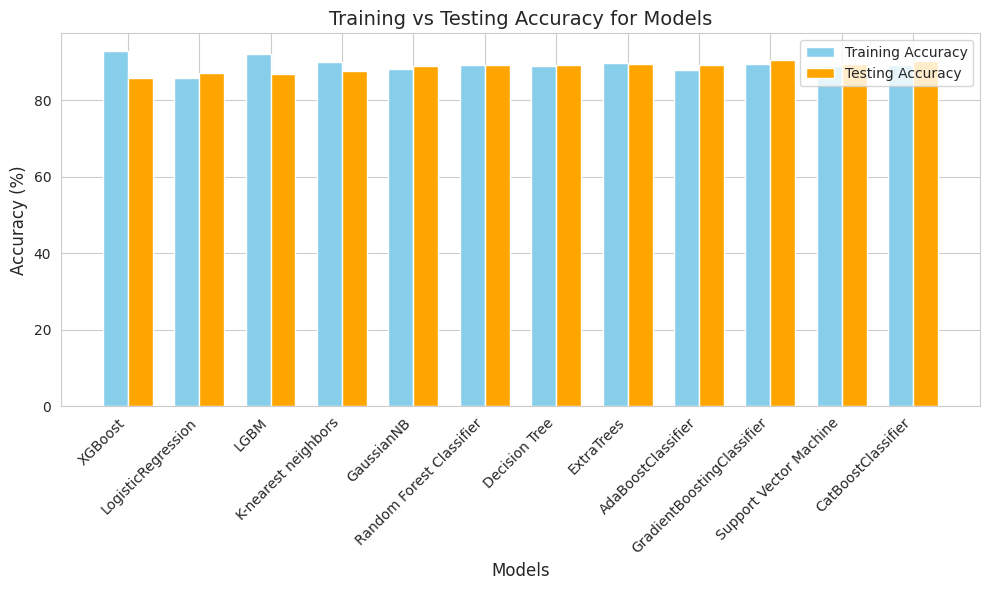

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the DataFrame
models = results_df['Model']
training_accuracy = results_df['Training Accuracy %']
testing_accuracy = results_df['Testing Accuracy %']

# Set the width for the bars
bar_width = 0.35
index = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, training_accuracy, bar_width, label='Training Accuracy', color='skyblue')
plt.bar(index + bar_width, testing_accuracy, bar_width, label='Testing Accuracy', color='orange')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Training vs Testing Accuracy for Models', fontsize=14)
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [185]:
from sklearn.metrics import auc

auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_gnb=auc(false_positive_rate_gnb_clf,true_positive_rate_gnb_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_etc=auc(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
auc_ab=auc(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_cbc=auc(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)

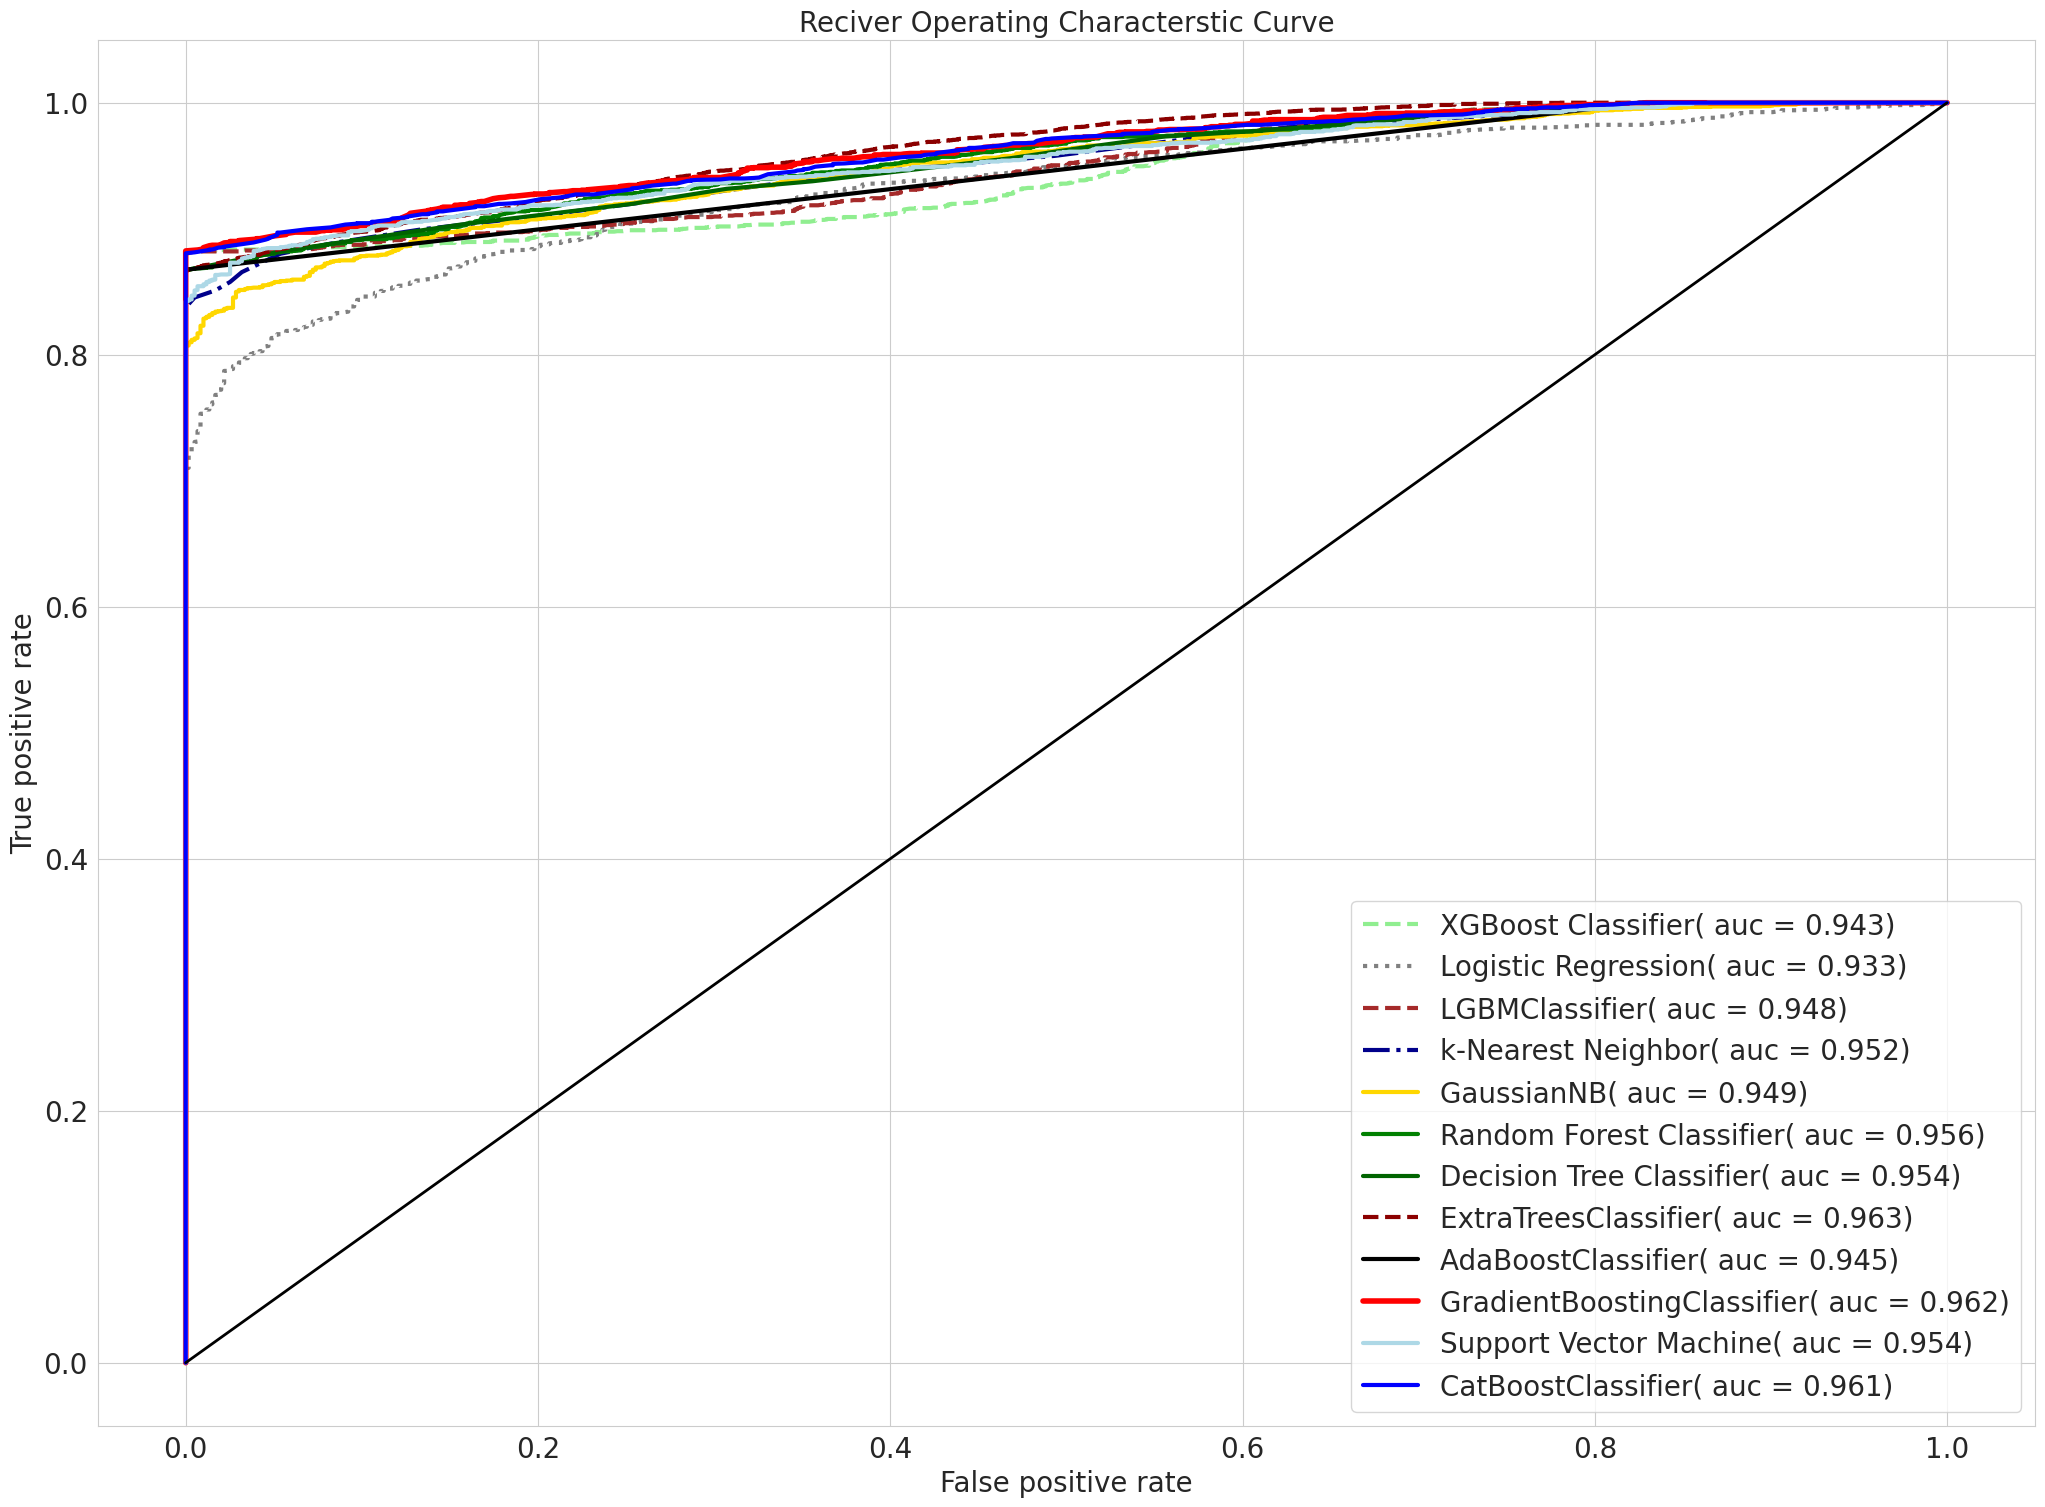

In [186]:
#Plot All ROC Curve`s

sns.set_style('whitegrid')
plt.figure(figsize=(25,18))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Reciver Operating Characterstic Curve',fontsize=20)

plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=3,color="lightgreen",linestyle='--',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=3,color="gray",linestyle='dotted',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=3,color="brown",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=3,color="darkblue",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_gnb_clf,true_positive_rate_gnb_clf,linewidth=3,color="gold",linestyle='-',label='GaussianNB( auc = %0.3f)' % auc_gnb)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=3,color="green",linestyle='solid',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=3,color="darkgreen",linestyle='-',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf,linewidth=3,color="darkred",linestyle='--',label='ExtraTreesClassifier( auc = %0.3f)' % auc_etc)
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf,linewidth=3,color="black",linestyle='-',label='AdaBoostClassifier( auc = %0.3f)' % auc_ab)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=4,color="red",linestyle='solid',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=3,color="lightblue",linestyle='solid',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,linewidth=3,color="blue",linestyle='solid',label='CatBoostClassifier( auc = %0.3f)' % auc_cbc)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate',fontsize=20)
plt.xlabel('False positive rate',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [2]:
# Install required packages
!pip install -q scikit-learn pandas gTTS

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, HTML, Audio
from gtts import gTTS  # Google Text-to-Speech (gTTS) library

# Load and preprocess data
data = pd.read_csv('/content/cardio_train.csv', sep=';')
data['BMI'] = data['weight'] / ((data['height'] / 100) ** 2)
data['Age'] = (data['age'] / 365).astype(int)
data.rename(columns={'ap_hi': 'Systolic_Blood_Pressure', 'ap_lo': 'Diastolic_Blood_Pressure'}, inplace=True)
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

# Prepare features and target
target_column = 'cardio'
X = data.drop(columns=[target_column])
y = data[target_column]

# Train model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = GradientBoostingClassifier()
model.fit(X_scaled, y)

# Create widgets
style = {'description_width': '200px'}
layout = widgets.Layout(width='400px')

age = widgets.IntText(description="Age (years):", style=style, layout=layout)
gender = widgets.Dropdown(description="Gender:", options=[('Female', 1), ('Male', 2)], style=style, layout=layout)
height = widgets.FloatText(description="Height (cm):", style=style, layout=layout)
weight = widgets.FloatText(description="Weight (kg):", style=style, layout=layout)
systolic = widgets.IntText(description="Systolic BP:", style=style, layout=layout)
diastolic = widgets.IntText(description="Diastolic BP:", style=style, layout=layout)
cholesterol = widgets.Dropdown(description="Cholesterol:",
                              options=[('Normal', 1), ('Above Normal', 2), ('Well Above Normal', 3)],
                              style=style, layout=layout)
gluc = widgets.Dropdown(description="Glucose:",
                       options=[('Normal', 1), ('Above Normal', 2), ('Well Above Normal', 3)],
                       style=style, layout=layout)
smoke = widgets.Dropdown(description="Smoker:", options=[('No', 0), ('Yes', 1)], style=style, layout=layout)
alco = widgets.Dropdown(description="Alcohol:", options=[('No', 0), ('Yes', 1)], style=style, layout=layout)
active = widgets.Dropdown(description="Active:", options=[('No', 0), ('Yes', 1)], style=style, layout=layout)

predict_btn = widgets.Button(description="Predict Risk", button_style='success')
output = widgets.Output()

# Create form UI
form = widgets.VBox([
    age,
    gender,
    height,
    weight,
    systolic,
    diastolic,
    cholesterol,
    gluc,
    smoke,
    alco,
    active,
    predict_btn,
    output
], layout=widgets.Layout(align_items='center'))

# Function to speak the result
def speak_output(prediction):
    # Use gTTS to generate speech from the prediction
    tts = gTTS(text=prediction, lang='en')
    tts.save("/content/result.mp3")  # Save the speech to an mp3 file
    return Audio("/content/result.mp3", autoplay=True)  # Play the generated mp3 file

# Prediction function
def on_predict_click(b):
    with output:
        output.clear_output()

        # Convert years to days for age
        age_days = age.value * 365

        # Create input dictionary
        user_data = {
            'age': age_days,
            'gender': gender.value,
            'height': height.value,
            'weight': weight.value,
            'Systolic_Blood_Pressure': systolic.value,
            'Diastolic_Blood_Pressure': diastolic.value,
            'cholesterol': cholesterol.value,
            'gluc': gluc.value,
            'smoke': smoke.value,
            'alco': alco.value,
            'active': active.value
        }

        # Calculate derived features
        user_data['BMI'] = user_data['weight'] / ((user_data['height']/100) ** 2)
        user_data['Age'] = age.value  # Already in years from input

        # Create DataFrame in correct feature order
        user_df = pd.DataFrame([user_data])[X.columns]

        try:
            # Scale features and predict
            scaled_data = scaler.transform(user_df)
            prediction = model.predict(scaled_data)[0]

            # Determine risk level
            risk_level = "High Risk 🚨" if prediction == 1 else "Low Risk ✅"

            # Display the result
            display(HTML(f"""
                <div style="padding:20px; margin-top:20px; border-radius:5px;
                            background:{"#ffcccc" if prediction == 1 else "#ccffcc"}">
                    <h3>Prediction Result:</h3>
                    <p style="font-size:24px; font-weight:bold">{risk_level}</p>
                </div>
            """))

            # Speak the result
            display(speak_output(risk_level))  # Display and play the speech

        except Exception as e:
            print(f"Error: {str(e)}")

# Register click handler
predict_btn.on_click(on_predict_click)

# Display the form
display(form)